# Wrangle and Analyze Data project

In [1]:
import requests
import numpy as np
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# suppress scientific notation for floats (expo)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# expanding full text
pd.set_option('display.max_colwidth', -1)

# Dataframes defenitions

### arch_origin_df
    dataframe of tweet archive file with no modifications

###  img_origin_df
    dataframe of image predection file with no modifications

###  arch_df
    dataframe of tweet archive file after:
        1- dropping retweets and replies
        2- merging with original image prediction dataframe to drop datasets of tweets with no image 
        (self status tweets)

### img_df
    dataframe of image prediction file after merging with arch_df to drop retweets, quotes etc   

### arch_clean_df
      arch_df after cleaning

### img_clean_df
      img_df after cleaning

### count_clean_df
       count_df after cleaning

### master_df
      master dataframe 

# Gathering Data
#### 1-image prediction file downloaded using requests module
#### 2-tweet archive file downloaded manually
#### 3-tweet json  file downloaded from Udacity's server 

In [3]:
##Downloading the image predictions file
import requests
x =requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open ("image-predictions.tsv","wb") as file:
    file.write(x.content)

In [4]:
# Downloading the API file info
tweets = []
adjust_tweets = []
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

for tweet in tweets:
    tweet_id = tweet["id"]
    favorite_count = tweet["favorite_count"]
    retweet_count = tweet["retweet_count"]
    followers_count = tweet["user"]["followers_count"]
    adjust_tweets.append({"tweet_id": tweet_id,"favorite_count":favorite_count,
    "retweet_count":retweet_count, "followers_count":followers_count})

#creating dataframe with proper index and ascending tweet_id
count_df = pd.DataFrame(adjust_tweets)
#problem in order of columns appeared as tweet_id was last
# could use this as well df = df.reindex(columns=column_names)
count_df = count_df[["tweet_id","favorite_count","retweet_count","followers_count"]]
count_df = count_df.sort_values("tweet_id")
count_df.reset_index(drop = True,inplace = True)

In [5]:
arch_origin_df = pd.read_csv("twitter-archive-enhanced.csv")

In [6]:
img_origin_df = pd.read_csv("image-predictions.tsv", sep = '\t')

In [7]:
arch_origin_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,nan,nan,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [8]:
img_origin_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
count_df.head(10)

,tweet_id,favorite_count,retweet_count,followers_count
0,666020888022790149,2535,532,3201018
1,666029285002620928,132,48,3201018
2,666033412701032449,128,47,3201018
3,666044226329800704,311,147,3201018
4,666049248165822465,111,41,3201018
5,666050758794694657,136,60,3201018
6,666051853826850816,1253,879,3201018
7,666055525042405380,448,261,3201018
8,666057090499244032,304,146,3201018
9,666058600524156928,115,61,3201018


# Assesing Data



## Quality issues

##### Tweets should be an original tweet that contains an image:
  
- Dropping replies and retweets from twitter archive df (non-null values in these columns) 
- Checking with image predection df for image provided (intersection between arch df and img df)


### twitter archive df

- timestamp is object: convert to datetime

-  Irrelevant columns to be dropped after cleaning
    
        retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper,puppo,   in_reply_to_status_id, in_reply_to_user_id, source, expanded_urls



- None values in dog_stage column (ex: doggo, floofer, pupper, puppo): set to null

##### name column

    
- None values: convert to null


- name values (all lowercase names are invalid)
        
- a/an names: extract names if possible using regex (name/d) + "name value" 
        
- lowercase names other than a/an : set to null



##### rating_numerator column and rating_denominator columns
    
    
- Float value ratings  extracted and set incorrectly  
    
- Incorrect values extracted given multiple ratios in text
    
- Multiple ratings for multiple dogs in one text: not incoorect and slight diffrence between ratings 
        wouldn't cause an issue
    
- Collective rating for multiple dogs in a photo i.e:(420/400): taking into account rating factor 
        (rating_numerator / rating_denominator) 

                  
#### expanded_urls column
- Duplicated values (self status tweets, replies, retweets): solved by dropping retweets and replies + check with image prediction 

- Null values: same solution above

- invalid urls (correct url repeated more than once): could be solved using regex https till https



### image prediction df

- Each row should be an original tweet with an image: some rows are quotes, self-retweets, replies
                                               
        solved by checking with archive df after dropping replies and retweets

- Duplicated values in jpg_url column: same problem as above:  self-retweets


- img_num column:  many (3) values should be converted to (4)

-  Columns' names are not expressive of their values: renaming corrrectly predictions,confidences and p_dog 

- Breeds names are inconsistent, some breeds names start with lower case letter and other with upper case: changing into lower case and replacing _ (underscore) with a space

- Necessary breed column after drawing conclusions from image prediction df



### count_df

- Rows (datasets) containg retweets, replies and quotes: inner merge with twitter archive (after drop and check with image prediction)

# Tidiness issues


- Creating a master df structured mainly of twitter archive df and merging with counts df and dog_type column obtained from image prediction df


-  doggo, floofer, pupper, puppo columns in twitter archive df to be reduced into one column dog_stage


##  twitter archive df assessment

In [10]:
arch_origin_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
323,834089966724603904,nan,nan,2017-02-21 17:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE 10/10 https://t.co/ffIH2WxwF0,nan,nan,NaN,https://twitter.com/stevekopack/status/834086676934836224,10,10,None,doggo,None,None,None
661,791026214425268224,nan,nan,2016-10-25 21:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Alfie. He's touching a butt. Couldn't be happier. 11/10 https://t.co/gx3xF5mZbo,763837565564780544.000000,4196983835.000000,2016-08-11 20:40:41 +0000,"https://twitter.com/dog_rates/status/763837565564780549/photo/1,https://twitter.com/dog_rates/status/763837565564780549/photo/1",11,10,Alfie,None,None,None,None
770,776819012571455488,nan,nan,2016-09-16 16:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Everybody look at this beautiful pupper 13/10 https://t.co/hyAC5Hq9GC,679828447187857408.000000,4196983835.000000,2015-12-24 00:58:27 +0000,"https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1",13,10,None,None,None,pupper,None
2340,666099513787052032,nan,nan,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can stand on stump for what seems like a while. Built that birdhouse? Impressive. Made friends with a squirrel. 8/10 https://t.co/Ri4nMTLq5C,nan,nan,NaN,https://twitter.com/dog_rates/status/666099513787052032/photo/1,8,10,None,None,None,None,None
883,760252756032651264,nan,nan,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,nan,nan,NaN,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
1884,674800520222154752,nan,nan,2015-12-10 03:59:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tedders. He broke his leg saving babies from the Pompeii eruption. 11/10 where's his Purple Heart? @POTUS https://t.co/cMI2AcLm4B,nan,nan,NaN,https://twitter.com/dog_rates/status/674800520222154752/photo/1,11,10,Tedders,None,None,None,None
1807,676916996760600576,nan,nan,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Super speedy pupper. Does not go gentle into that goodnight. 10/10 https://t.co/uPXBXS1XNb,nan,nan,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
1859,675497103322386432,nan,nan,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Reggie. He's going for the world record. Must concentrate. Focus up pup. 11/10 we all believe in you Reggie https://t.co/h3AWz4AzuC,nan,nan,NaN,https://twitter.com/dog_rates/status/675497103322386432/photo/1,11,10,Reggie,None,None,None,None
1626,684800227459624960,nan,nan,2016-01-06 18:14:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Theodore. He's dapper as hell. Probably owns horses. Uses 'summer' as a verb. Often quotes philosophers. 11/10 https://t.co/J3Ld4fRbSy,nan,nan,NaN,https://twitter.com/dog_rates/status/684800227459624960/photo/1,11,10,Theodore

In [11]:
arch_origin_df.shape

(2356, 17)

In [12]:
arch_origin_df.duplicated().sum()

0

In [13]:
#checking for duplicate expanded urls (probably self-retweets for tweets in df that will be solved natuarlly on merge)
arch_origin_df.expanded_urls.duplicated().sum()

137

In [14]:
arch_origin_df.expanded_urls.isnull().sum()

59

In [15]:
# datasets in image_df and not in archive 
print(pd.merge(img_origin_df, arch_origin_df, on="tweet_id", how="outer", indicator=True).query('_merge=="left_only"').shape[0])
# datasets in archive and not in image_df 
print(pd.merge(arch_origin_df, img_origin_df, on="tweet_id", how="outer", indicator=True).query('_merge=="left_only"').shape[0])

#getting intersection between img and arch original dfs
print(pd.merge(arch_origin_df, img_origin_df, how = "inner", on ="tweet_id").shape[0])

0
281
2075


archive contain 281 datasets diffrent from img predection df: mostly quotes, mentions and self-retweets and status tweets

In [16]:
print(arch_origin_df.doggo.value_counts())
print(arch_origin_df.floofer.value_counts())
print(arch_origin_df.puppo.value_counts())
print(arch_origin_df.pupper.value_counts())

None     2259
doggo    97  
Name: doggo, dtype: int64
None       2346
floofer    10  
Name: floofer, dtype: int64
None     2326
puppo    30  
Name: puppo, dtype: int64
None      2099
pupper    257 
Name: pupper, dtype: int64


In [17]:
arch_origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## image prediction assessment 

In [18]:
img_origin_df.shape

(2075, 12)

In [19]:
img_origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
img_origin_df.jpg_url.duplicated().sum()

66

In [21]:
img_origin_df.duplicated().sum()

0

## count_df assessment

In [22]:
count_df.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count
2062,838083903487373313,19183,3582,3200891
1365,748705597323898880,3047,1067,3200943
676,682032003584274432,7223,2294,3200952
2265,875021211251597312,26022,4922,3200891
2303,882268110199369728,45880,12118,3200890
671,681679526984871937,1923,499,3200952
591,678424312106393600,5916,2880,3200954
2142,851861385021730816,0,23,3200891
1944,823322678127919110,17437,4637,3200894
124,668226093875376128,323,115,3201015


In [23]:
count_df.shape

(2354, 4)

In [24]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
favorite_count     2354 non-null int64
retweet_count      2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [25]:
count_df.duplicated().sum()

0

#### Neccesarly dropping rows != original tweets or ! contain image to proceed assesing the values accurately

In [26]:
# Dropping rows: replies and retweets 
arch_df = arch_origin_df[arch_origin_df["in_reply_to_status_id"].isnull() & arch_origin_df["retweeted_status_id"].isnull()]

#Note that:

df3 = df[df['retweeted_status_id'].isnull() & df['in_reply_to_status_id'].isnull()]

df3 = df[df['retweeted_status_id'].isnull() ]

df3 = df3[df3[‘retweeted_status_id'].isnull() ]



In [27]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [28]:
arch_df.expanded_urls.isnull().sum()

3

In [29]:
# self status tweets
arch_df[arch_df.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,nan,nan,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,nan,nan,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,nan,nan,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",nan,nan,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,nan,nan,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,nan,nan,NaN,NaN,10,10,None,None,None,pupper,None


In [30]:
arch_df.shape

(2097, 17)

In [31]:
# getting the intersection between arch_df (after dropping retweets and replies) and img_origin_df to cancel datasets with no photos in arch_df and unoriginal tweets img_origin__df
# merging with arch_df not arch_origin_df
arch_df = pd.merge(arch_df, img_origin_df, how = "inner", on ="tweet_id")
#instead of merging again, could copy arch_df before dropping img_origin_df columns from it
img_df = arch_df.copy()
# dropping img_origin_df columns after copying safely
arch_df.drop(img_origin_df.columns.drop("tweet_id"), axis = 1, inplace = True)

# modifying for img_df
# could use here arch_origin_df
img_df.drop(arch_df.columns.drop("tweet_id"), axis = 1, inplace = True)

# note: df.columns.drop("column") gets list of columns without column
arch_df = arch_df.sort_values("tweet_id")
arch_df.reset_index(drop = True,inplace = True)
img_df = img_df.sort_values("tweet_id")
img_df.reset_index(drop = True,inplace = True)

In [32]:
arch_df.shape

(1971, 17)

In [33]:
arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,nan,nan,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,nan,nan,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None
1,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
3,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
4,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None


In [34]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 17 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
dtypes: float64(4), int64(3), object(10)

In [35]:
img_df.shape

(1971, 12)

In [36]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id    1971 non-null int64
jpg_url     1971 non-null object
img_num     1971 non-null int64
p1          1971 non-null object
p1_conf     1971 non-null float64
p1_dog      1971 non-null bool
p2          1971 non-null object
p2_conf     1971 non-null float64
p2_dog      1971 non-null bool
p3          1971 non-null object
p3_conf     1971 non-null float64
p3_dog      1971 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 144.4+ KB


# Proceeding with assesment 

## arhcive_df

In [38]:
arch_df.expanded_urls.isnull().sum()

0

## Assesing name column

In [39]:
arch_df.name.value_counts()

None          524
a             55 
Charlie       11 
Oliver        10 
Cooper        10 
Lucy          10 
Tucker        9  
Penny         9  
Sadie         8  
Winston       8  
Daisy         7  
Lola          7  
Toby          7  
the           7  
Bella         6  
Jax           6  
an            6  
Stanley       6  
Koda          6  
Bo            6  
Oscar         5  
Louis         5  
Scout         5  
Bailey        5  
Leo           5  
Dave          5  
Chester       5  
Rusty         5  
Milo          5  
Buddy         5  
             ..  
Kingsley      1  
Mac           1  
Chubbs        1  
Ashleigh      1  
DonDon        1  
Huxley        1  
Blipson       1  
Superpup      1  
Tupawc        1  
Remy          1  
Hamrick       1  
Lugan         1  
Simba         1  
Mosby         1  
Harvey        1  
Brandonald    1  
Hercules      1  
Travis        1  
Zara          1  
Sprinkles     1  
Spark         1  
Rambo         1  
Fiji          1  
Arya          1  
Mookie    

In [40]:
# got "name/d + (name) " pattern
arch_df.loc[arch_df.name == "a", "text"].sample(17)

916     This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW 
223     This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj   
220     This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN  
41      This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB 
312     This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7    
3       This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
130     Here is a mother dog caring for her pups. Snazzy red mohawk. Doesn't wag tail. Pups look confused.

In [41]:
arch_df.loc[(arch_df.name == "an"), "text"]

6       This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc 
20      This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   
22      This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL
147     This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg
915     This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR              
1214    This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt 
Name: text, dtype: object

In [42]:
arch_df.name.unique()

array(['None', 'a', 'an', 'the', 'quite', 'Walter', 'Scout', 'Kreggory',
       'Jimothy', 'Christoper', 'Lugan', 'Josep', 'Jockson', 'Jeph',
       'Carll', 'Klevin', 'Keet', 'Dave', 'Clybe', 'Gabe', 'Pipsy',
       'Bradlay', 'Churlie', 'Kenneth', 'Clarence', 'Timison', 'Joshwa',
       'Genevieve', 'Fwed', 'Biden', 'Cupcake', 'Reese', 'Philippe',
       'Hall', 'Dook', 'Naphaniel', 'Frank', 'Kial', 'George', 'Olive',
       'Calvin', 'Filup', 'Shaggy', 'Tedrick', 'Stu', 'Erik',
       'Cleopatricia', 'Otis', 'Jiminy', 'Alfie', 'Skittles', 'Ron',
       'Torque', 'Bisquick', 'Jareld', 'Sophie', 'Rusty', 'DayZ', 'Jo',
       'Gòrdón', 'Spark', 'Marvin', 'Kallie', 'Jomathan', 'Maks', 'Timofy',
       'Zeek', 'Hanz', 'Winifred', 'Kevon', 'Banditt', 'Bobb', 'Amélie',
       'Ruffles', 'Lambeau', 'Herald', 'Jaycob', 'Jeremy', 'Chaz', 'Ruby',
       'Bernie', 'Harrison', 'Terrance', 'Tucker', 'Samsom', 'Jaspers',
       'Clarq', 'Ralf', 'Kirk', 'Sully', 'Dug', 'Saydee', 'Chip',
       'Oli

 All lower names are invalid names

In [43]:
print( [elem  for elem in arch_df.name.unique() if elem.islower()] )

['a', 'an', 'the', 'quite', 'space', 'just', 'light', 'one', 'officially', 'by', 'actually', 'getting', 'very', 'infuriating', 'all', 'unacceptable', 'this', 'his', 'not', 'my', 'incredibly', 'such']


## Heading for numerators and denominators 

## Asses rating_numerator 

In [44]:
arch_df.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       150
8       95 
7       52 
5       33 
14      33 
6       32 
3       19 
4       16 
2       9  
1       5  
1776    1  
24      1  
26      1  
420     1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      1  
80      1  
84      1  
88      1  
99      1  
121     1  
144     1  
165     1  
204     1  
0       1  
Name: rating_numerator, dtype: int64

In [45]:
arch_df.rating_numerator.describe()

count   1971.000000
mean    12.223237  
std     41.634034  
min     0.000000   
25%     10.000000  
50%     11.000000  
75%     12.000000  
max     1776.000000
Name: rating_numerator, dtype: float64

In [46]:
print(arch_df.loc[arch_df.rating_numerator == 1776, "text"])

1248    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object


In [47]:
arch_df[arch_df.rating_numerator == 50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1052,716439118184652801,nan,nan,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,nan,nan,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None


In [48]:
# 24/7 to null or a default value
arch_df[arch_df["rating_numerator"] == 24]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1588,810984652412424192,nan,nan,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,nan,nan,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


In [49]:
arch_df[arch_df["rating_numerator"] == 99]["text"]

1031    Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Name: text, dtype: object

In [50]:
#9,75 num not 75 << approx 10
arch_df[arch_df["rating_numerator"] == 75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1471,786709082849828864,nan,nan,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",nan,nan,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


In [51]:
arch_df[arch_df["rating_numerator"] == 1]["text"]

17     Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX      
20     This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv    
93     Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx
257    Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO    
469    What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0                   
Name: text, dtype: object

## rating_denominator assesment

In [52]:
arch_df.rating_denominator.value_counts()

10     1954
50     3   
80     2   
11     2   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
7      1   
2      1   
Name: rating_denominator, dtype: int64

In [53]:
arch_df.rating_denominator.describe()

count   1971.000000
mean    10.477423  
std     6.853275   
min     2.000000   
25%     10.000000  
50%     10.000000  
75%     10.000000  
max     170.000000 
Name: rating_denominator, dtype: float64

In [54]:
arch_df[arch_df.rating_denominator == 170]["text"]

1128    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object

In [55]:
# 7/11 to 10/10
#9/11 to 14/1
arch_df[arch_df.rating_denominator == 11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
657,682962037429899265,nan,nan,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,nan,nan,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None
1176,740373189193256964,nan,nan,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",nan,nan,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None


In [56]:
arch_df[arch_df.rating_denominator == 50]["text"]

925     Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa                                                                
989     From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1052    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                             
Name: text, dtype: object

In [57]:
# check for denominator > 10 and multiple of 10 (multiple dogs) 
arch_df.loc[(arch_df.rating_denominator > 10) & (arch_df.rating_denominator %10 == 0), ['tweet_id','rating_numerator', 'rating_denominator', 'text']]

,tweet_id,rating_numerator,rating_denominator,text
492,675853064436391936,88,80,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
550,677716515794329600,144,120,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
682,684222868335505415,121,110,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
850,697463031882764288,44,40,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
925,704054845121142784,60,50,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
989,709198395643068416,45,50,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1007,710658690886586372,80,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1031,713900603437621249,99,90,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1052,716439118184652801,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1086,722974582966214656,4,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


In [58]:
# check for decimals in text (first decimal != 0 check) using regex pattern on nominator
'''
10.0' % 1; // returns 0
10 % 1; // returns 0
10.5' % 1; // returns 0.5
10.5 % 1; // returns 0.5
'''
arch_df[arch_df.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float') % 1 != 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
611,680494726643068929,nan,nan,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,nan,nan,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None
1421,778027034220126208,nan,nan,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,nan,nan,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1471,786709082849828864,nan,nan,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",nan,nan,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
1931,883482846933004288,nan,nan,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",nan,nan,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None


In [59]:
# check for multiple values in text
# Compiling a regex to capture the decimal as well as whole numbers and testing it on some sample text from the dataframe
num_p = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')
for index, row in arch_df.iterrows(): 
    allnums = re.findall(num_p,row["text"])
    if len(allnums) > 1 :
        print(allnums)
        print(row["text"])
        print(str(row["tweet_id"]) + " " + str(row["rating_numerator"]) + " " + str(row["rating_denominator"]))
        print()



[('1', '2'), ('9', '10')]
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
666287406224695296 1 2

[('10', '10'), ('10', '10')]
These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1
666835007768551424 10 10

[('7', '10'), ('8', '10')]
Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y
667491009379606528 7 10

[('10', '10'), ('4', '10')]
This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR
667544320556335104 10 10

[('8', '10'), ('1', '10')]
This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba
668537837512433665 8 10

[('10', '10'), ('7', '10')]
Her

In [60]:
arch_df[arch_df.tweet_id == 667878741721415682]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
106,667878741721415682,nan,nan,2015-11-21 01:34:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,nan,nan,NaN,https://twitter.com/dog_rates/status/667878741721415682/photo/1,2,10,Tedrick,None,None,None,None


### Assesing dog stage columns (doggo, floofer,  pupper, puppo)

In [61]:
print(arch_df.doggo.value_counts())
print(arch_df.floofer.value_counts())
print(arch_df.puppo.value_counts())
print(arch_df.pupper.value_counts())

None     1898
doggo    73  
Name: doggo, dtype: int64
None       1963
floofer    8   
Name: floofer, dtype: int64
None     1948
puppo    23  
Name: puppo, dtype: int64
None      1762
pupper    209 
Name: pupper, dtype: int64


# Assesing img_df

In [62]:
img_df.jpg_url.duplicated().sum()

0

In [63]:
img_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [64]:
img_df.dtypes

tweet_id    int64  
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

In [65]:
img_df.p1_dog.unique()

array([ True, False], dtype=bool)

In [66]:
img_df.p2_dog.unique()

array([ True, False], dtype=bool)

In [67]:
img_df.p3_dog.unique()

array([ True, False], dtype=bool)

## First prediction assesment

In [68]:
img_df.p1.value_counts().head(40)

golden_retriever                  137
Labrador_retriever                94 
Pembroke                          88 
Chihuahua                         78 
pug                               54 
chow                              41 
Samoyed                           40 
Pomeranian                        38 
toy_poodle                        37 
malamute                          29 
cocker_spaniel                    27 
French_bulldog                    26 
Chesapeake_Bay_retriever          23 
seat_belt                         21 
miniature_pinscher                21 
Siberian_husky                    20 
German_shepherd                   20 
Staffordshire_bullterrier         19 
Maltese_dog                       18 
Eskimo_dog                        18 
Shetland_sheepdog                 18 
teddy                             17 
Cardigan                          17 
beagle                            17 
Shih-Tzu                          17 
Italian_greyhound                 16 
Rottweiler  

In [69]:
img_df.p1.value_counts().tail(15)

lacewing               1
flamingo               1
basketball             1
starfish               1
ocarina                1
American_black_bear    1
leaf_beetle            1
handkerchief           1
tricycle               1
picket_fence           1
sea_urchin             1
dough                  1
canoe                  1
cheetah                1
padlock                1
Name: p1, dtype: int64

In [70]:
#check for non-dog top values in p1
img_df[img_df.p1_dog == False]["p1"].value_counts().head(5)

seat_belt      21
teddy          17
web_site       14
tennis_ball    8 
dingo          8 
Name: p1, dtype: int64

In [71]:
img_df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

In [72]:
img_df.p1.nunique()

373

In [73]:
img_df[img_df.p1 == "teddy"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
73,667369227918143488,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,teddy,0.709545,False,bath_towel,0.127285,False,Christmas_stocking,0.028568,False
156,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
206,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False
387,673576835670777856,https://pbs.twimg.com/media/CVkGjsxU8AA5OYX.jpg,1,teddy,0.255210,False,Christmas_stocking,0.098285,False,pajama,0.072735,False
505,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False
550,677716515794329600,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True
643,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
822,694183373896572928,https://pbs.twimg.com/media/CaI8Fn0WAAIrFJN.jpg,1,teddy,0.441499,False,Pekinese,0.080870,True,Shih-Tzu,0.072099,True
927,704347321748819968,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,1,teddy,0.233378,False,feather_boa,0.088474,False,Brittany_spaniel,0.082917,True
1089,723688335806480385,https://pbs.twimg.com/media/CgsOszGW0AAruKp.jpg,2,teddy,0.263256,False,chow,0.089010,True,Irish_terrier,0.065306,True


In [74]:
img_df[img_df.p1 == "web_site"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
128,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
210,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
267,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
703,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
1190,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
1293,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1408,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False
1411,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False,pug,0.000077,True,menu,0.000002,False
1502,792913359805018113,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,4,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False
1562,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False


In [75]:
img_df[img_df.p1 == "seat_belt"].sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1578,808733504066486276,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,seat_belt,0.779137,False,toy_poodle,0.036927,True,golden_retriever,0.016972,True
1473,787322443945877504,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,seat_belt,0.747739,False,golden_retriever,0.105703,True,dingo,0.017257,False
632,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,seat_belt,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True
195,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat_belt,0.874502,False,golden_retriever,0.055408,True,Labrador_retriever,0.026854,True
728,687312378585812992,https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg,1,seat_belt,0.703561,False,Great_Dane,0.139909,True,Weimaraner,0.021112,True
541,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,0.209213,True
1210,745712589599014916,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
1450,782969140009107456,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
512,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,seat_belt,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True


In [76]:
img_df[img_df.p1 == "dingo"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
258,670786190031921152,https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg,1,dingo,0.777124,False,Pembroke,0.127438,True,Cardigan,0.024007,True
466,675146535592706048,https://pbs.twimg.com/media/CV6aMToXIAA7kH4.jpg,1,dingo,0.288447,False,Cardigan,0.229944,True,Pembroke,0.190407,True
657,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
1009,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True
1016,711732680602345472,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True
1041,715009755312439296,https://pbs.twimg.com/media/Cew5kyOWsAA8Y_o.jpg,1,dingo,0.310903,False,Chihuahua,0.142288,True,Cardigan,0.103945,True
1602,813112105746448384,https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg,1,dingo,0.287369,False,Pembroke,0.140682,True,basenji,0.090819,True
1667,823581115634085888,https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg,1,dingo,0.280949,False,German_shepherd,0.194044,True,Pembroke,0.120051,True


In [77]:
img_df[img_df.p1 == "golden_retriever"].sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1615,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True
1685,826958653328592898,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
1174,740359016048689152,https://pbs.twimg.com/media/CkZImGVUoAAwv0b.jpg,1,golden_retriever,0.863687,True,kuvasz,0.048590,True,Labrador_retriever,0.047397,True
1593,812372279581671427,https://pbs.twimg.com/media/C0YgO3DW8AAz98O.jpg,2,golden_retriever,0.784873,True,cocker_spaniel,0.087788,True,Labrador_retriever,0.083275,True
508,676470639084101634,https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg,1,golden_retriever,0.790386,True,borzoi,0.022885,True,dingo,0.015343,False
88,667530908589760512,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,1,golden_retriever,0.633037,True,kuvasz,0.146391,True,Labrador_retriever,0.046184,True
1524,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/795464066940764160/pu/img/jPkMMQXdydb7CqFX.jpg,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True
1192,743210557239623680,https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg,1,golden_retriever,0.930705,True,Chesapeake_Bay_retriever,0.025934,True,Labrador_retriever,0.007535,True
1449,782747134529531904,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,golden_retriever,0.560699,True,otterhound,0.199482,True,clumber,0.040682,True
1572,807010152071229440,https://pbs.twimg.com/media/CzMTcZoXUAEKqEt.jpg,1,golden_retriever,0.610807,True,Irish_setter,0.213642,True,Welsh_springer_spaniel,0.031887,True


In [78]:
img_df[img_df.p1_dog == True].count()

tweet_id    1463
jpg_url     1463
img_num     1463
p1          1463
p1_conf     1463
p1_dog      1463
p2          1463
p2_conf     1463
p2_dog      1463
p3          1463
p3_conf     1463
p3_dog      1463
dtype: int64

In [79]:
img_df[img_df.p1_dog == False].count()

tweet_id    508
jpg_url     508
img_num     508
p1          508
p1_conf     508
p1_dog      508
p2          508
p2_conf     508
p2_dog      508
p3          508
p3_conf     508
p3_dog      508
dtype: int64

In [80]:
img_df[img_df.p1_dog == True].sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1471,786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
571,678774928607469569,https://pbs.twimg.com/media/CWt-MNIWEAAUC9S.jpg,1,Pembroke,0.194681,True,toy_poodle,0.121821,True,Pomeranian,0.096843,True
1900,876484053909872640,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,1,golden_retriever,0.874566,True,Irish_terrier,0.037354,True,chow,0.016724,True
1838,859851578198683649,https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg,4,Labrador_retriever,0.899086,True,golden_retriever,0.047091,True,kuvasz,0.023206,True
1940,885984800019947520,https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg,1,Blenheim_spaniel,0.972494,True,Shih-Tzu,0.006630,True,Bernese_mountain_dog,0.006239,True
653,682662431982772225,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,1,beagle,0.413824,True,Cardigan,0.263553,True,basset,0.167618,True
1275,752334515931054080,https://pbs.twimg.com/ext_tw_video_thumb/752334354492362752/pu/img/uWISPc0YRmhUi9Ju.jpg,1,Bedlington_terrier,0.399163,True,standard_poodle,0.086425,True,wire-haired_fox_terrier,0.075231,True
1480,788412144018661376,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,1,golden_retriever,0.805238,True,Labrador_retriever,0.113798,True,Brittany_spaniel,0.038559,True
1334,761292947749015552,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1,standard_poodle,0.660893,True,Samoyed,0.314886,True,miniature_poodle,0.008834,True
1370,768855141948723200,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,chow,0.720219,True,Brabancon_griffon,0.058365,True,Rottweiler,0.055114,True


In [81]:
img_df[img_df.p1_dog == False].sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1337,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg,1,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False
386,673363615379013632,https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg,1,ox,0.193431,False,warthog,0.123827,False,bison,0.111177,False
1397,773308824254029826,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,1,shopping_cart,0.572349,False,Labrador_retriever,0.151406,True,shopping_basket,0.107102,False
1064,718460005985447936,https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg,1,badger,0.356946,False,Boston_bull,0.252781,True,kelpie,0.113433,True
1250,750011400160841729,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,1,muzzle,0.237620,False,Boston_bull,0.087150,True,sombrero,0.068510,False
931,704761120771465216,https://pbs.twimg.com/media/CcfQgHVWoAAxauy.jpg,1,Siamese_cat,0.202294,False,Chihuahua,0.100418,True,basenji,0.072097,True
148,668641109086707712,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,1,vacuum,0.432594,False,pug,0.146311,True,toilet_tissue,0.024500,False
1806,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1450,782969140009107456,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
1700,828770345708580865,https://pbs.twimg.com/media/C4BiOXOXAAAf6IS.jpg,1,seat_belt,0.765979,False,Chesapeake_Bay_retriever,0.033899,True,polecat,0.027252,False


## Second prediction assesment

In [82]:
img_df.p2.value_counts().head(40)

Labrador_retriever                95
golden_retriever                  82
Cardigan                          72
Chihuahua                         43
Chesapeake_Bay_retriever          40
French_bulldog                    39
Pomeranian                        38
toy_poodle                        36
Siberian_husky                    33
miniature_poodle                  32
cocker_spaniel                    32
Eskimo_dog                        27
beagle                            27
collie                            26
kuvasz                            24
Pembroke                          24
Italian_greyhound                 22
Pekinese                          21
chow                              20
miniature_pinscher                20
malinois                          20
American_Staffordshire_terrier    20
Norwegian_elkhound                19
toy_terrier                       19
Boston_bull                       19
Samoyed                           17
Staffordshire_bullterrier         17
p

In [83]:
img_df.p2.value_counts().tail(30)

goose            1
sunglass         1
volcano          1
jean             1
window_shade     1
snorkel          1
cougar           1
EntleBucher      1
crutch           1
seashore         1
wallaby          1
shower_cap       1
brown_bear       1
bow              1
wombat           1
mailbox          1
hatchet          1
mashed_potato    1
torch            1
grey_whale       1
snowmobile       1
spotlight        1
hummingbird      1
platypus         1
accordion        1
bathing_cap      1
toaster          1
cab              1
laptop           1
crib             1
Name: p2, dtype: int64

In [84]:
#check for non-dog values in p2
img_df[img_df.p2_dog == False]["p2"].value_counts().head(10)

doormat        11
seat_belt      11
teddy          10
ice_bear       9 
Siamese_cat    9 
guinea_pig     6 
llama          6 
bath_towel     6 
sunglasses     5 
hamster        5 
Name: p2, dtype: int64

In [85]:
img_df[img_df.p2 == "doormat"].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1756,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.132820,True
643,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
639,681891461017812993,https://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg,1,Chihuahua,0.203570,True,doormat,0.134316,False,toy_terrier,0.084482,True
515,676606785097199616,https://pbs.twimg.com/media/CWPKSGpWcAQN6mw.jpg,1,Loafer,0.202999,False,doormat,0.200411,False,malinois,0.142300,True
314,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False


In [86]:
img_df.p2.nunique()

397

In [87]:
img_df.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone', 'Rottweiler',
       'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [88]:
# number of dogs in p2
img_df[img_df.p2_dog == True].count()

tweet_id    1480
jpg_url     1480
img_num     1480
p1          1480
p1_conf     1480
p1_dog      1480
p2          1480
p2_conf     1480
p2_dog      1480
p3          1480
p3_conf     1480
p3_dog      1480
dtype: int64

In [89]:
# number of non-dogs in p2
img_df[img_df.p2_dog == False].count()

tweet_id    491
jpg_url     491
img_num     491
p1          491
p1_conf     491
p1_dog      491
p2          491
p2_conf     491
p2_dog      491
p3          491
p3_conf     491
p3_dog      491
dtype: int64

In [90]:
img_df[img_df.p2_dog == True].sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True
843,696886256886657024,https://pbs.twimg.com/media/CavWWdFWAAArflW.jpg,1,kuvasz,0.383941,True,golden_retriever,0.289085,True,dingo,0.056548,False
203,669926384437997569,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg,1,Pomeranian,0.984231,True,keeshond,0.010231,True,papillon,0.002219,True
556,678334497360859136,https://pbs.twimg.com/media/CWntoDVWcAEl3NB.jpg,1,Norfolk_terrier,0.378643,True,golden_retriever,0.095594,True,kelpie,0.085309,True
1192,743210557239623680,https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg,1,golden_retriever,0.930705,True,Chesapeake_Bay_retriever,0.025934,True,Labrador_retriever,0.007535,True
1454,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True
1877,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True
1443,781524693396357120,https://pbs.twimg.com/media/CtiIj0AWcAEBDvw.jpg,1,tennis_ball,0.994712,False,Chesapeake_Bay_retriever,0.003523,True,Labrador_retriever,0.000921,True
1627,817056546584727552,https://pbs.twimg.com/media/C1bEl4zVIAASj7_.jpg,1,kelpie,0.864415,True,French_bulldog,0.097456,True,German_shepherd,0.008526,True
390,673612854080196609,https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg,1,Newfoundland,0.223101,True,Leonberg,0.111106,True,shovel,0.085626,False


In [91]:
img_df[img_df.p2_dog == False].sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
927,704347321748819968,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,1,teddy,0.233378,False,feather_boa,0.088474,False,Brittany_spaniel,0.082917,True
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,0.114071,False,common_iguana,0.043255,False
104,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,0.000000,False,doormat,0.000000,False
207,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.176320,False,hair_spray,0.097487,False,toy_poodle,0.086502,True
269,670826280409919488,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,1,scorpion,0.927956,False,tarantula,0.021631,False,wolf_spider,0.014837,False
1648,820078625395449857,https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg,3,school_bus,0.999833,False,cab,0.000160,False,crane,0.000002,False
1815,853299958564483072,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1,grille,0.652280,False,beach_wagon,0.112846,False,convertible,0.086252,False
1362,767191397493538821,https://pbs.twimg.com/media/CqWcgcqWcAI43jm.jpg,1,patio,0.708665,False,boathouse,0.110056,False,pier,0.039532,False
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
641,682003177596559360,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1,triceratops,0.249872,False,chimpanzee,0.060929,False,mask,0.050221,False


## Third prediction assesment

In [92]:
img_df.p3.value_counts().head(40)

Labrador_retriever                76
Chihuahua                         57
golden_retriever                  45
Eskimo_dog                        36
kelpie                            33
kuvasz                            31
chow                              30
Staffordshire_bullterrier         30
toy_poodle                        29
beagle                            29
cocker_spaniel                    29
Pekinese                          28
Pomeranian                        27
Pembroke                          26
malamute                          25
French_bulldog                    25
Great_Pyrenees                    25
Chesapeake_Bay_retriever          24
Cardigan                          23
American_Staffordshire_terrier    23
pug                               21
basenji                           20
bull_mastiff                      19
Siberian_husky                    19
toy_terrier                       18
Boston_bull                       17
Shetland_sheepdog                 16
b

In [93]:
img_df.p3.value_counts().tail(30)

otter                 1
grocery_store         1
book_jacket           1
power_drill           1
black_swan            1
wombat                1
hatchet               1
ballplayer            1
grand_piano           1
croquet_ball          1
consomme              1
chime                 1
prairie_chicken       1
snail                 1
Kerry_blue_terrier    1
cab                   1
mushroom              1
conch                 1
French_loaf           1
wallet                1
jaguar                1
nail                  1
Band_Aid              1
acorn                 1
switch                1
zebra                 1
boathouse             1
wild_boar             1
tiger_cat             1
rapeseed              1
Name: p3, dtype: int64

In [94]:
img_df.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua', 'Shih-Tzu',
       'Pomeranian', 'dingo', 'power_drill', 'Saluki', 'Great_Pyrenees',
       'West_Highland_white_terrier', 'collie', 'toy_poodle', 'vizsla',
       'acorn', 'giant_schnauzer', 'teddy', 'common_iguana', 'wig',
       'water_buffalo', 'coyote', 'seat_belt', 'kelpie', 'space_heater',
       'Brabancon_griffon', 'standard_poodle', 'beagle',
       'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [95]:
img_df.p3.nunique()

403

In [96]:
# number of dogs in p3
img_df[img_df.p3_dog == True].count()

tweet_id    1431
jpg_url     1431
img_num     1431
p1          1431
p1_conf     1431
p1_dog      1431
p2          1431
p2_conf     1431
p2_dog      1431
p3          1431
p3_conf     1431
p3_dog      1431
dtype: int64

In [97]:
# number of non-dogs in p3
img_df[img_df.p3_dog == False].count()

tweet_id    540
jpg_url     540
img_num     540
p1          540
p1_conf     540
p1_dog      540
p2          540
p2_conf     540
p2_dog      540
p3          540
p3_conf     540
p3_dog      540
dtype: int64

In [98]:
img_df[img_df.p3_dog == True].sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
80,667455448082227200,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
1203,744709971296780288,https://pbs.twimg.com/media/ClW9w7mWEAEFN1k.jpg,1,Shetland_sheepdog,0.234431,True,Samoyed,0.114876,True,collie,0.086614,True
955,706681918348251136,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,toy_poodle,0.717584,True,miniature_poodle,0.151433,True,Norwich_terrier,0.047087,True
136,668537837512433665,https://pbs.twimg.com/media/CUcfnWlWsAAzlwE.jpg,1,Lakeland_terrier,0.372988,True,toy_poodle,0.250445,True,Chihuahua,0.189737,True
957,707014260413456384,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,1,Chihuahua,0.583780,True,Italian_greyhound,0.129683,True,toy_terrier,0.089153,True
606,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True
1969,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
822,694183373896572928,https://pbs.twimg.com/media/CaI8Fn0WAAIrFJN.jpg,1,teddy,0.441499,False,Pekinese,0.080870,True,Shih-Tzu,0.072099,True
1218,746872823977771008,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,1,Pembroke,0.540201,True,beagle,0.207835,True,Italian_greyhound,0.043565,True


In [99]:
img_df[img_df.p2_dog == False].sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
706,685667379192414208,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,1,sliding_door,0.344526,False,doormat,0.190027,False,washbasin,0.046326,False
1482,788908386943430656,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,1,remote_control,0.881538,False,oscilloscope,0.035513,False,golden_retriever,0.034090,True
570,678767140346941444,https://pbs.twimg.com/media/CWt3G6EVEAIGEPr.jpg,1,harp,0.821120,False,window_screen,0.025121,False,mosquito_net,0.016716,False
476,675483430902214656,https://pbs.twimg.com/media/CV_MmGZU8AAggM6.jpg,1,box_turtle,0.543706,False,terrapin,0.202600,False,loggerhead,0.071122,False
94,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
549,677700003327029250,https://pbs.twimg.com/media/CWesj06W4AAIKl8.jpg,1,Siberian_husky,0.120849,True,junco,0.079206,False,malamute,0.063088,True
1290,754747087846248448,https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg,1,rotisserie,0.471493,False,cash_machine,0.250837,False,sliding_door,0.117872,False
1325,760190180481531904,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,1,balloon,0.917525,False,confectionery,0.049329,False,maraca,0.017648,False
1015,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1440,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,padlock,0.731564,False,necklace,0.065462,False,chain,0.036469,False


## Overall assesment of predictions

### Statistically describing each predection level to determine most trusted resullt on the basis of confidence level

In [100]:
img_df.p1_conf.describe()

count   1971.000000
mean    0.594558   
std     0.272126   
min     0.044333   
25%     0.363091   
50%     0.587764   
75%     0.847827   
max     1.000000   
Name: p1_conf, dtype: float64

In [101]:
img_df.p2_conf.describe()

count   1971.000000
mean    0.134585   
std     0.101053   
min     0.000000   
25%     0.053398   
50%     0.117397   
75%     0.195566   
max     0.488014   
Name: p2_conf, dtype: float64

In [102]:
img_df.p3_conf.describe()

count   1971.000000
mean    0.060166   
std     0.050942   
min     0.000000   
25%     0.016081   
50%     0.049444   
75%     0.091538   
max     0.273419   
Name: p3_conf, dtype: float64

In [103]:
# checking case second prediction more trusted than first prediction
img_df[img_df.p2_conf > img_df.p1_conf].sum()

tweet_id   0.000000
jpg_url    0.000000
img_num    0.000000
p1         0.000000
p1_conf    0.000000
p1_dog     0.000000
p2         0.000000
p2_conf    0.000000
p2_dog     0.000000
p3         0.000000
p3_conf    0.000000
p3_dog     0.000000
dtype: float64

In [104]:
img_df[ (img_df.p1_dog == True) & (img_df.p2_dog == False) & (img_df.p3_dog == False ) ].count()

tweet_id    42
jpg_url     42
img_num     42
p1          42
p1_conf     42
p1_dog      42
p2          42
p2_conf     42
p2_dog      42
p3          42
p3_conf     42
p3_dog      42
dtype: int64

In [105]:
img_df[ (img_df.p1_dog == True) & (img_df.p2_dog == False) & (img_df.p3_dog == False ) ].sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1941,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False
1146,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
1179,740711788199743490,https://pbs.twimg.com/media/CkeJcNkXEAAcrks.jpg,1,toy_poodle,0.388277,True,Angora,0.180264,False,Persian_cat,0.049656,False
1270,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False
612,680497766108381184,https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg,1,Chihuahua,0.538354,True,muzzle,0.084289,False,ski_mask,0.076690,False
316,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
836,695794761660297217,https://pbs.twimg.com/media/Caf1pQxWIAEme3q.jpg,1,Samoyed,0.962139,True,Arctic_fox,0.030553,False,white_wolf,0.001482,False
231,670421925039075328,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,1,Chihuahua,0.275793,True,corn,0.073596,False,bolete,0.054905,False
1083,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,0.950053,True,washbasin,0.006321,False,tub,0.006243,False
748,688828561667567616,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,Cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,0.031158,False


In [106]:
img_df[ (img_df.p1_dog == False) & (img_df.p2_dog == True) ].count()

tweet_id    143
jpg_url     143
img_num     143
p1          143
p1_conf     143
p1_dog      143
p2          143
p2_conf     143
p2_dog      143
p3          143
p3_conf     143
p3_dog      143
dtype: int64

In [107]:
img_df[ (img_df.p1_dog == False) & (img_df.p2_dog == True)  ].sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1397,773308824254029826,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,1,shopping_cart,0.572349,False,Labrador_retriever,0.151406,True,shopping_basket,0.107102,False
1307,757725642876129280,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,2,seat_belt,0.425176,False,Labrador_retriever,0.128128,True,Siamese_cat,0.091241,False
1697,828409743546925057,https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg,1,teddy,0.908457,False,toy_poodle,0.018040,True,standard_poodle,0.012667,True
408,673919437611909120,https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg,1,jack-o'-lantern,0.172079,False,schipperke,0.115984,True,miniature_pinscher,0.052175,True
931,704761120771465216,https://pbs.twimg.com/media/CcfQgHVWoAAxauy.jpg,1,Siamese_cat,0.202294,False,Chihuahua,0.100418,True,basenji,0.072097,True
1637,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,swing,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,0.000030,False
1134,732732193018155009,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1,koala,0.162935,False,Staffordshire_bullterrier,0.127969,True,mongoose,0.096421,False
1394,772877495989305348,https://pbs.twimg.com/ext_tw_video_thumb/772874595468795904/pu/img/t8gbjy2rA19xtQYR.jpg,1,tabby,0.218303,False,Norwegian_elkhound,0.138523,True,wombat,0.074217,False
407,673906403526995968,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,1,toilet_seat,0.683319,False,soft-coated_wheaten_terrier,0.048928,True,Siberian_husky,0.030386,True
1911,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True


In [108]:
img_df[ (img_df.p1_dog == False) & (img_df.p2_dog == False) & (img_df.p3_dog == True ) ].count()

tweet_id    60
jpg_url     60
img_num     60
p1          60
p1_conf     60
p1_dog      60
p2          60
p2_conf     60
p2_dog      60
p3          60
p3_conf     60
p3_dog      60
dtype: int64

In [109]:
# basis: p3_conf > 0.03
img_df[ (img_df.p1_dog == False) & (img_df.p2_dog == False) & (img_df.p3_dog == True )  ].sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
156,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
846,697242256848379904,https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg,1,grey_fox,0.236031,False,Siamese_cat,0.165791,False,Eskimo_dog,0.063533,True
779,690690673629138944,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1,bath_towel,0.194532,False,radiator,0.127776,False,Maltese_dog,0.089625,True
1521,794926597468000259,https://pbs.twimg.com/media/CwglhZVXgAAc3_w.jpg,1,teddy,0.569566,False,bath_towel,0.173745,False,toy_poodle,0.037662,True
1645,819711362133872643,https://pbs.twimg.com/media/C2AzHjQWQAApuhf.jpg,2,acorn_squash,0.848704,False,toilet_seat,0.044348,False,toy_poodle,0.022009,True
1127,730924654643314689,https://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg,1,polecat,0.185382,False,mink,0.105282,False,Newfoundland,0.086241,True
1571,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
808,693095443459342336,https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg,1,ice_lolly,0.660099,False,neck_brace,0.039563,False,Yorkshire_terrier,0.033488,True
1105,727286334147182592,https://pbs.twimg.com/media/ChfXDrGUkAEAtF-.jpg,1,bonnet,0.146440,False,sock,0.083091,False,Chihuahua,0.070554,True
622,680959110691590145,https://pbs.twimg.com/media/CXNAsm6WsAEST9R.jpg,2,carousel,0.500992,False,feather_boa,0.064390,False,pug,0.044357,True


In [110]:
img_df[ (img_df.p1_dog == False) & (img_df.p2_dog == False) & (img_df.p3_dog == True ) & (img_df.p3_conf < 0.03) ].count()

tweet_id    21
jpg_url     21
img_num     21
p1          21
p1_conf     21
p1_dog      21
p2          21
p2_conf     21
p2_dog      21
p3          21
p3_conf     21
p3_dog      21
dtype: int64

In [111]:
# basis: p2_conf > 0.1
img_df[ (img_df.p1_dog == False) & (img_df.p2_dog == True) & (img_df.p3_dog == False ) & (img_df.p2_conf < 0.1) ]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
143,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,ox,0.071536,False,groenendael,0.054455,True,Angora,0.045028,False
234,670433248821026816,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,1,window_shade,0.583427,False,giant_schnauzer,0.062215,True,window_screen,0.039941,False
267,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
311,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
327,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False
505,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False
589,679729593985699840,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,1,wallaby,0.164215,False,West_Highland_white_terrier,0.093515,True,ashcan,0.067278,False
659,683078886620553216,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,koala,0.141432,False,Eskimo_dog,0.094044,True,wallaby,0.085237,False
1091,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False


In [112]:
img_df[ (img_df.p1_dog == False) & (img_df.p2_dog == False) & (img_df.p3_dog == False ) ].count()

tweet_id    305
jpg_url     305
img_num     305
p1          305
p1_conf     305
p1_dog      305
p2          305
p2_conf     305
p2_dog      305
p3          305
p3_conf     305
p3_dog      305
dtype: int64

In [113]:
img_df[ (img_df.p1_dog == False) & (img_df.p2_dog == False) & (img_df.p3_dog == False ) ].sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1018,711968124745228288,https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,1,espresso,0.430135,False,coffee_mug,0.418483,False,cup,0.088391,False
1123,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,1,hand_blower,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False
1063,718454725339934721,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,1,hammer,0.169865,False,hatchet,0.115744,False,chime,0.068092,False
896,700796979434098688,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg,1,tailed_frog,0.652712,False,tree_frog,0.280212,False,bullfrog,0.040177,False
1440,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,padlock,0.731564,False,necklace,0.065462,False,chain,0.036469,False
968,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False
304,671533943490011136,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,hen,0.556524,False,cock,0.442033,False,black_swan,0.001181,False
686,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
1794,847962785489326080,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,1,sea_lion,0.882654,False,mink,0.066880,False,otter,0.025679,False
570,678767140346941444,https://pbs.twimg.com/media/CWt3G6EVEAIGEPr.jpg,1,harp,0.821120,False,window_screen,0.025121,False,mosquito_net,0.016716,False


## img_num column

In [114]:
img_df["img_num"].unique()

array([1, 4, 2, 3])

In [115]:
img_df["img_num"].value_counts()

1    1692
2    190 
3    59  
4    30  
Name: img_num, dtype: int64

In [116]:
img_df[img_df.img_num == 3].sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1519,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
1091,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
592,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
756,689280876073582592,https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg,3,Chihuahua,0.637546,True,American_Staffordshire_terrier,0.150694,True,Staffordshire_bullterrier,0.103953,True
1280,753026973505581056,https://pbs.twimg.com/media/CnNKCKKWEAASCMI.jpg,3,Pembroke,0.868511,True,Cardigan,0.103708,True,Shetland_sheepdog,0.018142,True
1407,775364825476165632,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,True,Chihuahua,0.175257,True,Pembroke,0.034306,True
1169,739606147276148736,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,3,Blenheim_spaniel,0.933755,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True
1411,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False,pug,0.000077,True,menu,0.000002,False
1761,840268004936019968,https://pbs.twimg.com/media/C6k7SaEXUAg83_J.jpg,3,Chesapeake_Bay_retriever,0.863987,True,Labrador_retriever,0.052632,True,kelpie,0.032574,True
909,702321140488925184,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3,West_Highland_white_terrier,0.769159,True,Scotch_terrier,0.064369,True,Old_English_sheepdog,0.043763,True


In [117]:
img_df[img_df.img_num == 4].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1638,818614493328580609,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,4,Chihuahua,0.450722,True,Border_terrier,0.204177,True,beagle,0.092774,True
767,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1006,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1453,783391753726550016,https://pbs.twimg.com/media/Ct8qn8EWIAAk9zP.jpg,4,Norwegian_elkhound,0.877130,True,cairn,0.086241,True,keeshond,0.011019,True
1316,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True


In [118]:
img_df[img_df.img_num == 2].sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1948,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
998,709901256215666688,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,2,bib,0.998814,False,handkerchief,0.000512,False,umbrella,0.000224,False
1882,871762521631449091,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,Labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True
1020,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True
1615,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True
1803,850145622816686080,https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg,2,tennis_ball,0.714798,False,kelpie,0.105390,True,malinois,0.058553,True
1801,849776966551130114,https://pbs.twimg.com/media/C8sDpDWWsAE5P08.jpg,2,Chihuahua,0.292092,True,toy_terrier,0.136852,True,bonnet,0.103111,False
1945,886983233522544640,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,2,Chihuahua,0.793469,True,toy_terrier,0.143528,True,can_opener,0.032253,False
1499,792394556390137856,https://pbs.twimg.com/media/Cv8moW9W8AIHOxR.jpg,2,cocker_spaniel,0.746387,True,Irish_setter,0.091615,True,miniature_poodle,0.061078,True
1410,775842724423557120,https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg,2,chow,0.520022,True,bath_towel,0.028775,False,French_bulldog,0.025990,True


In [119]:
img_df.img_num.describe()

count   1971.000000
mean    1.201928   
std     0.559020   
min     1.000000   
25%     1.000000   
50%     1.000000   
75%     1.000000   
max     4.000000   
Name: img_num, dtype: float64

## Assesing count df  (before merge)

In [120]:
count_df.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count
1565,773985732834758656,11925,4492,3200904
212,669970042633789440,317,65,3201011
1542,771136648247640064,10223,3357,3200905
1712,793210959003287553,9997,3301,3200901
1166,718246886998687744,2115,565,3200944
602,678800283649069056,2810,1018,3200953
36,666447344410484738,107,23,3201017
1489,762035686371364864,35400,17919,3200908
725,684538444857667585,2915,1085,3200950
1450,758099635764359168,21302,11550,3200943


In [121]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
favorite_count     2354 non-null int64
retweet_count      2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [122]:
count_df.favorite_count.describe()

count   2354.000000  
mean    8080.968564  
std     11814.771334 
min     0.000000     
25%     1415.000000  
50%     3603.500000  
75%     10122.250000 
max     132810.000000
Name: favorite_count, dtype: float64

In [123]:
count_df.retweet_count.describe()

count   2354.000000 
mean    3164.797366 
std     5284.770364 
min     0.000000    
25%     624.500000  
50%     1473.500000 
75%     3652.000000 
max     79515.000000
Name: retweet_count, dtype: float64

In [124]:
count_df.followers_count.describe()

count   2354.000000   
mean    3200941.590059
std     44.573015     
min     3200799.000000
25%     3200898.000000
50%     3200945.000000
75%     3200953.000000
max     3201018.000000
Name: followers_count, dtype: float64

In [125]:
count_df[count_df.favorite_count == count_df.favorite_count.max()]

,tweet_id,favorite_count,retweet_count,followers_count
1941,822872901745569793,132810,48265,3200894


In [126]:
count_df[count_df.favorite_count == count_df.favorite_count.min()].sample(15)

,tweet_id,favorite_count,retweet_count,followers_count
1929,821421320206483457,0,6470,3200894
1904,818646164899774465,0,24069,3200894
1418,753298634498793472,0,6620,3200943
1609,780092040432480260,0,2655,3200901
1768,799774291445383169,0,5488,3200898
2022,832769181346996225,0,43,3200892
1554,772615324260794368,0,3914,3200904
1742,796904159865868288,0,10411,3200900
2013,832215726631055365,0,10723,3200892
2160,855245323840757760,0,6568,3200891


In [127]:
count_df[count_df.retweet_count == count_df.retweet_count.max()]

,tweet_id,favorite_count,retweet_count,followers_count
1316,744234799360020481,131075,79515,3200943


In [128]:
count_df[count_df.retweet_count == count_df.retweet_count.min()]

,tweet_id,favorite_count,retweet_count,followers_count
2063,838085839343206401,150,0,3200891


# Clean

# Clean tweet archive df  (arch_df)

In [129]:
arch_clean_df = arch_df.copy()

In [130]:
arch_clean_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,nan,nan,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,nan,nan,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None
1,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
3,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
4,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None


## Solving four columns of dog_stage 

### Define
    -- doggo, pupper, puppo and floofer into one column

### Code

In [131]:
#iloc for index, loc for values
arch_clean_df.iloc[:,-4:] = arch_clean_df.iloc[:,-4:].replace("None","")

arch_clean_df["dog_stage"] = arch_clean_df["doggo"] + arch_clean_df["floofer"] + arch_clean_df["pupper"] + arch_clean_df["puppo"]

#columns with two types replacing
arch_clean_df.loc[arch_clean_df.dog_stage == "doggopupper", "dog_stage"] = "doggo_pupper"
arch_clean_df.loc[arch_clean_df.dog_stage == "doggopuppo", "dog_stage"] = "doggo_puppo"
arch_clean_df.loc[arch_clean_df.dog_stage == "doggofloofer", "dog_stage"] = "doggo_floofer"

#replacing empty srtings values with nulls
arch_clean_df.loc[arch_clean_df["dog_stage"] == "", "dog_stage"] = np.nan

#dropping four original dog stage columns
arch_clean_df.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis = 1,inplace = True)



### Test

In [132]:
arch_clean_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,nan,nan,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,nan,nan,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,NaN
1,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,NaN
2,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,NaN
3,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,NaN
4,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,NaN


In [133]:
arch_clean_df.dog_stage.value_counts()

pupper           201
doggo            63 
puppo            22 
doggo_pupper     8  
floofer          7  
doggo_floofer    1  
doggo_puppo      1  
Name: dog_stage, dtype: int64

## Names 

### Define
• None values: convert to null

• a/an names: extract names - set to null

• lowercase names other than a/an: set to null

### Code

In [134]:
# could use elem != "a" and elem !="an" inside []
invalid_names = [elem for elem in arch_clean_df.name.unique() if elem.islower()]
invalid_names.remove("a")
invalid_names.remove("an")
print(invalid_names)

['the', 'quite', 'space', 'just', 'light', 'one', 'officially', 'by', 'actually', 'getting', 'very', 'infuriating', 'all', 'unacceptable', 'this', 'his', 'not', 'my', 'incredibly', 'such']


In [135]:
pattern_1 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in arch_clean_df.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_1, row['text'])[0]
            arch_clean_df.loc[index,'name'] = arch_clean_df.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_1, row['text'])[0]
            arch_clean_df.loc[index,'name'] = arch_clean_df.loc[index,'name'].replace('an', c_name)
        elif row['name'] in invalid_names:
            arch_clean_df.loc[index,'name'] = np.nan
    except IndexError:
        arch_clean_df.loc[index,'name'] = np.nan

            
arch_clean_df.name.value_counts(dropna = False)

None          524
NaN           77 
Charlie       11 
Lucy          10 
Oliver        10 
Cooper        10 
Penny         9  
Tucker        9  
Winston       8  
Sadie         8  
Daisy         7  
Lola          7  
Toby          7  
Bo            6  
Jax           6  
Koda          6  
Stanley       6  
Bella         6  
Chester       5  
Bailey        5  
Oscar         5  
Milo          5  
Louis         5  
Dave          5  
Buddy         5  
Rusty         5  
Leo           5  
Scout         5  
Larry         4  
Phil          4  
             ..  
Tonks         1  
Cecil         1  
Monty         1  
Siba          1  
Carbon        1  
Gustav        1  
Fwed          1  
Mookie        1  
Davey         1  
Daniel        1  
Chef          1  
Tupawc        1  
Remy          1  
Hamrick       1  
Callie        1  
Lugan         1  
Simba         1  
Mosby         1  
Willie        1  
Harvey        1  
Brandonald    1  
Hercules      1  
Travis        1  
Zara          1  
Sprinkles 

In [136]:
# None to null
arch_clean_df.name.replace("None", np.nan,inplace = True)

### Test

In [137]:
arch_clean_df.name.isnull().sum()

601

## Manual fix for rating_numerator and denominator

### Define
    -- fixing issues with numerator and denominator values

### Code

In [138]:
arch_clean_df.rating_numerator = arch_clean_df.rating_numerator.astype(float)
arch_clean_df.rating_numerator = arch_clean_df.rating_denominator.astype(float)


#50/50 to 11/10
arch_clean_df.loc[arch_clean_df.tweet_id == 716439118184652801,"rating_numerator"] = 11
arch_clean_df.loc[arch_clean_df.tweet_id == 716439118184652801,"rating_denominator"] = 10


# 1/2 to 9/10
arch_clean_df.loc[arch_clean_df.tweet_id == 666287406224695296,"rating_numerator"] = 9
arch_clean_df.loc[arch_clean_df.tweet_id == 666287406224695296,"rating_denominator"] = 10


#10&2
arch_clean_df.loc[arch_clean_df.tweet_id == 667878741721415682,"rating_numerator"] = 10.2



# 9 /11 to 14/10
arch_clean_df.loc[arch_clean_df.tweet_id == 740373189193256964,"rating_numerator"] = 14
arch_clean_df.loc[arch_clean_df.tweet_id == 740373189193256964,"rating_denominator"] = 10


# 7/11 to 10/10
arch_clean_df.loc[arch_clean_df.tweet_id == 682962037429899265,"rating_numerator"] = 10
arch_clean_df.loc[arch_clean_df.tweet_id == 682962037429899265,"rating_denominator"] = 10


# 4/20 to be 13/10
arch_clean_df.loc[arch_clean_df.tweet_id == 722974582966214656,"rating_numerator"] = 13
arch_clean_df.loc[arch_clean_df.tweet_id == 722974582966214656,"rating_denominator"] = 10

# 24/7 to null 810984652412424192
arch_clean_df.loc[arch_clean_df.tweet_id == 810984652412424192,"rating_numerator"] = np.nan
arch_clean_df.loc[arch_clean_df.tweet_id == 810984652412424192,"rating_denominator"] = np.nan

##### decimals


#9.75 to 10
arch_clean_df.loc[arch_clean_df.tweet_id == 786709082849828864,"rating_numerator"] = 9.75
#26 to 11.26
arch_clean_df.loc[arch_clean_df.tweet_id == 680494726643068929,"rating_numerator"] = 11.26
# 5 to 13.5
arch_clean_df.loc[arch_clean_df.tweet_id == 883482846933004288,"rating_numerator"] = 13.5
# 27 to 11.27
arch_clean_df.loc[arch_clean_df.tweet_id == 778027034220126208,"rating_numerator"] = 11.27





### Test

In [139]:
arch_clean_df.loc[arch_clean_df.tweet_id == 810984652412424192,] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1588,810984652412424192,nan,nan,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,nan,nan,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",nan,nan,Sam,NaN


In [140]:
arch_clean_df.loc[arch_clean_df.tweet_id == 740373189193256964,] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1176,740373189193256964,nan,nan,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",nan,nan,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14.000000,10.000000,NaN,NaN


## timestamp

### Define
    -- convert timestamp from object to daatetime type

### Code

In [141]:
arch_clean_df['timestamp'] = pd.to_datetime(arch_clean_df['timestamp'])

### Test

In [142]:
arch_clean_df.dtypes

tweet_id                      int64         
in_reply_to_status_id         float64       
in_reply_to_user_id           float64       
timestamp                     datetime64[ns]
source                        object        
text                          object        
retweeted_status_id           float64       
retweeted_status_user_id      float64       
retweeted_status_timestamp    object        
expanded_urls                 object        
rating_numerator              float64       
rating_denominator            float64       
name                          object        
dog_stage                     object        
dtype: object

## Dropping irrelvant columns
### Define
    -- dropping columns of no use

In [143]:
arch_clean_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

### Code

In [144]:
arch_clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
       'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls'],axis = 1, inplace = True)

### Test 

In [145]:
arch_clean_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,10.000000,10.000000,NaN,NaN
1,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,10.000000,10.000000,NaN,NaN
2,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,10.000000,10.000000,NaN,NaN
3,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,10.000000,10.000000,NaN,NaN
4,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,10.000000,10.000000,NaN,NaN


# Clean image prediction df (img_df)

In [146]:
img_clean_df = img_df.copy()

In [147]:
img_clean_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Renaming columns

### Define
    -- renaming column names that are not expressive of their values

In [148]:
img_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Code

In [149]:
# could use rename
# reordering columns is diffrent (see count df ordering in json gather)
img_clean_df.columns = ['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1', 'dog_1', 'prediction_2',
       'confidence_2', 'dog_2', 'prediction_3', 'confidence_3', 'dog_3']

### Test

In [150]:
img_clean_df.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Breed column creation

### Define
    --overwritting predections (3 to 2 to 1) on the basis: confidence_2 > 0.1   and confidence_3 > 0.03

### Code

In [151]:
img_clean_df["breed"] = np.nan

In [152]:
#depending on overwriting as condition does not work
img_clean_df.loc[(img_clean_df.dog_3 == True) & (img_clean_df.confidence_3 > 0.03),"breed"] = img_clean_df.prediction_3
img_clean_df.loc[(img_clean_df.dog_2 == True) & (img_clean_df.confidence_2 > 0.1),"breed"] = img_clean_df.prediction_2
img_clean_df.loc[img_clean_df.dog_1 == True,"breed"] = img_clean_df.prediction_1

In [153]:
# realocating some values mistaken in the given basis condition

#confidence_3 > 0.03 correct predictions of breed
img_clean_df.loc[img_clean_df.tweet_id == 666057090499244032,"breed"] = "golden_retriever"
img_clean_df.loc[img_clean_df.tweet_id == 882045870035918850,"breed"] = "golden_retriever"
img_clean_df.loc[img_clean_df.tweet_id == 672205392827572224,"breed"] = "pug"

#confidence_2 > 0.1 correct predictions of breed
img_clean_df.loc[img_clean_df.tweet_id == 672125275208069120,"breed"] = "golden_retriever"
img_clean_df.loc[img_clean_df.tweet_id == 676263575653122048,"breed"] = "toy_poodle"
img_clean_df.loc[img_clean_df.tweet_id == 670822709593571328,"breed"] = "Chihuahua"
img_clean_df.loc[img_clean_df.tweet_id == 668625577880875008,"breed"] = "groenendael"
img_clean_df.loc[img_clean_df.tweet_id == 776088319444877312,"breed"] = "pug"
img_clean_df.loc[img_clean_df.tweet_id == 745712589599014916,"breed"] = "chow"

### Test

In [154]:
img_clean_df[img_clean_df.tweet_id == 672125275208069120]

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3,breed
327,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False,golden_retriever


In [155]:
img_clean_df.sample(20)

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3,breed
1586,810657578271330305,https://pbs.twimg.com/media/C0AIwgVXAAAc1Ig.jpg,1,malamute,0.753521,True,Siberian_husky,0.166151,True,Eskimo_dog,0.069811,True,malamute
1315,758828659922702336,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.121840,True,Chesapeake_Bay_retriever
1226,747816857231626240,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True,Pembroke
1458,784431430411685888,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True,miniature_poodle
1334,761292947749015552,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1,standard_poodle,0.660893,True,Samoyed,0.314886,True,miniature_poodle,0.008834,True,standard_poodle
516,676613908052996102,https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg,1,book_jacket,0.493790,False,Doberman,0.096423,True,miniature_pinscher,0.070647,True,miniature_pinscher
309,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False,NaN
922,703631701117943808,https://pbs.twimg.com/media/CcPNS4yW8AAd-Et.jpg,2,window_shade,0.909533,False,window_screen,0.011427,False,brass,0.008882,False,NaN
1684,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True,Great_Pyrenees
502,676215927814406144,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,1,hamster,0.999484,False,guinea_pig,0.000158,False,broccoli,0.000061,False,NaN


## Breed naming 

### Define
-- Some breeds start with lowercase as: golden_retriever, others start with upper case as: Labrador_retriever

-- Space is better display than _

### Clean names of prediction 1, 2 and 3
### Code

In [156]:
img_clean_df["prediction_1"] = img_clean_df.prediction_1.str.lower().str.replace("_"," ")

In [157]:
img_clean_df["prediction_2"] = img_clean_df.prediction_2.str.lower().str.replace("_"," ")

In [158]:
img_clean_df["prediction_3"] = img_clean_df.prediction_3.str.lower().str.replace("_"," ")

### Test

In [159]:
img_clean_df.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher


### breed column
### Define
could cancel this whole step by cleaning predictions then creating breed column yet prefered to preview breed names in their original format firstly

In [160]:
img_clean_df.breed.value_counts()

golden_retriever               151
Labrador_retriever             101
Pembroke                       94 
Chihuahua                      88 
pug                            60 
chow                           45 
Samoyed                        42 
toy_poodle                     41 
Pomeranian                     41 
malamute                       33 
cocker_spaniel                 28 
French_bulldog                 28 
Chesapeake_Bay_retriever       26 
miniature_pinscher             24 
Shih-Tzu                       21 
Siberian_husky                 21 
Cardigan                       21 
German_shepherd                21 
Eskimo_dog                     20 
Staffordshire_bullterrier      20 
Shetland_sheepdog              19 
Maltese_dog                    19 
kuvasz                         18 
Italian_greyhound              17 
beagle                         17 
Lakeland_terrier               17 
Rottweiler                     16 
basset                         16 
Great_Pyrenees      

### Code

In [161]:
img_clean_df["breed"] = img_clean_df.breed.str.lower().str.replace("_"," ")

### Test

In [162]:
img_clean_df.breed.value_counts()

golden retriever                  151
labrador retriever                101
pembroke                          94 
chihuahua                         88 
pug                               60 
chow                              45 
samoyed                           42 
pomeranian                        41 
toy poodle                        41 
malamute                          33 
french bulldog                    28 
cocker spaniel                    28 
chesapeake bay retriever          26 
miniature pinscher                24 
shih-tzu                          21 
siberian husky                    21 
german shepherd                   21 
cardigan                          21 
staffordshire bullterrier         20 
eskimo dog                        20 
maltese dog                       19 
shetland sheepdog                 19 
kuvasz                            18 
italian greyhound                 17 
beagle                            17 
lakeland terrier                  17 
rottweiler  

# Clean count_df

### Define
original tweet with image,  merging  with arch_df



### Code

In [163]:
count_clean_df = pd.merge(arch_df,count_df, how = "inner", on="tweet_id")
count_clean_df.drop(arch_df.columns.drop("tweet_id"), axis=1, inplace = True)
count_clean_df

,tweet_id,favorite_count,retweet_count,followers_count
0,666020888022790149,2535,532,3201018
1,666029285002620928,132,48,3201018
2,666033412701032449,128,47,3201018
3,666044226329800704,311,147,3201018
4,666049248165822465,111,41,3201018
5,666050758794694657,136,60,3201018
6,666051853826850816,1253,879,3201018
7,666055525042405380,448,261,3201018
8,666057090499244032,304,146,3201018
9,666058600524156928,115,61,3201018


### Test

In [164]:
count_clean_df.shape

(1971, 4)

In [165]:
count_clean_df.favorite_count.describe()

count   1971.000000  
mean    8949.106545  
std     12267.799790 
min     81.000000    
25%     1997.000000  
50%     4147.000000  
75%     11402.500000 
max     132810.000000
Name: favorite_count, dtype: float64

In [166]:
count_clean_df.retweet_count.describe()

count   1971.000000 
mean    2784.449518 
std     4697.662893 
min     16.000000   
25%     628.500000  
50%     1367.000000 
75%     3239.000000 
max     79515.000000
Name: retweet_count, dtype: float64

In [167]:
count_clean_df.followers_count.describe()

count   1971.000000   
mean    3200946.254693
std     44.834179     
min     3200799.000000
25%     3200901.000000
50%     3200947.000000
75%     3201002.000000
max     3201018.000000
Name: followers_count, dtype: float64

In [168]:
count_clean_df[count_clean_df.retweet_count == count_clean_df.retweet_count.min()]

,tweet_id,favorite_count,retweet_count,followers_count
16,666102155909144576,81,16,3201018


In [169]:
count_clean_df[count_clean_df.retweet_count == count_clean_df.retweet_count.max()]

,tweet_id,favorite_count,retweet_count,followers_count
1201,744234799360020481,131075,79515,3200943


In [170]:
count_clean_df[count_clean_df.favorite_count == count_clean_df.favorite_count.max()]

,tweet_id,favorite_count,retweet_count,followers_count
1664,822872901745569793,132810,48265,3200894


In [171]:
count_clean_df[count_clean_df.favorite_count == count_clean_df.favorite_count.min()]

,tweet_id,favorite_count,retweet_count,followers_count
16,666102155909144576,81,16,3201018


# Creating a master dataframe

### Define
    -- masterdataframe of relevant and essential columns

### Code

In [172]:
# archive df is the main content
master_df = arch_clean_df.copy()

In [173]:
master_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,10.000000,10.000000,NaN,NaN
1,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,10.000000,10.000000,NaN,NaN
2,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,10.000000,10.000000,NaN,NaN
3,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,10.000000,10.000000,NaN,NaN
4,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,10.000000,10.000000,NaN,NaN


In [174]:
# creating breed column in master_df from img_clean_df 
'''
breed = img_clean_df["breed"]
master_df["breed"] = breed
'''
master_df = master_df.join(img_clean_df["breed"])

In [175]:
master_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,breed
0,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,10.000000,10.000000,NaN,NaN,welsh springer spaniel
1,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,10.000000,10.000000,NaN,NaN,redbone
2,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,10.000000,10.000000,NaN,NaN,german shepherd
3,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,10.000000,10.000000,NaN,NaN,rhodesian ridgeback
4,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,10.000000,10.000000,NaN,NaN,miniature pinscher


In [176]:
# could use inner merge on tweet_id
master_df = master_df.join([count_clean_df["favorite_count"],count_clean_df["retweet_count"]])

### Test

In [177]:
master_df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,breed,favorite_count,retweet_count
0,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,10.000000,10.000000,NaN,NaN,welsh springer spaniel,2535,532
1,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,10.000000,10.000000,NaN,NaN,redbone,132,48
2,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,10.000000,10.000000,NaN,NaN,german shepherd,128,47
3,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,10.000000,10.000000,NaN,NaN,rhodesian ridgeback,311,147
4,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,10.000000,10.000000,NaN,NaN,miniature pinscher,111,41
5,666050758794694657,2015-11-16 00:30:50,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,10.000000,10.000000,NaN,NaN,bernese mountain dog,136,60
6,666051853826850816,2015-11-16 00:35:11,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,10.000000,10.000000,NaN,NaN,NaN,1253,879
7,666055525042405380,2015-11-16 00:49:46,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,10.000000,10.000000,NaN,NaN,chow,448,261
8,666057090499244032,2015-11-16 00:55:59,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,10.000000,10.000000,NaN,NaN,golden retriever,304,146
9,666058600524156928,2015-11-16 01:01:59,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,10.000000,10.000000,NaN,NaN,miniature poodle,115,61


# Store 

storing master_df

In [178]:
master_df.to_csv('twitter-archive-master.csv', index=False)

# Visuals and Insights

### Number of tweets over time by (month,year)

In [179]:
tweet_by_time = master_df.groupby([master_df["timestamp"].dt.year, master_df["timestamp"].dt.month]).tweet_id.nunique()
tweet_by_time

timestamp  timestamp
2015       11           295
           12           360
2016       1            166
           2            108
           3            118
           4            54 
           5            56 
           6            79 
           7            88 
           8            59 
           9            63 
           10           65 
           11           52 
           12           54 
2017       1            66 
           2            64 
           3            47 
           4            40 
           5            42 
           6            44 
           7            49 
           8            2  
Name: tweet_id, dtype: int64

Text(0.5,1,'Number of tweets by month')

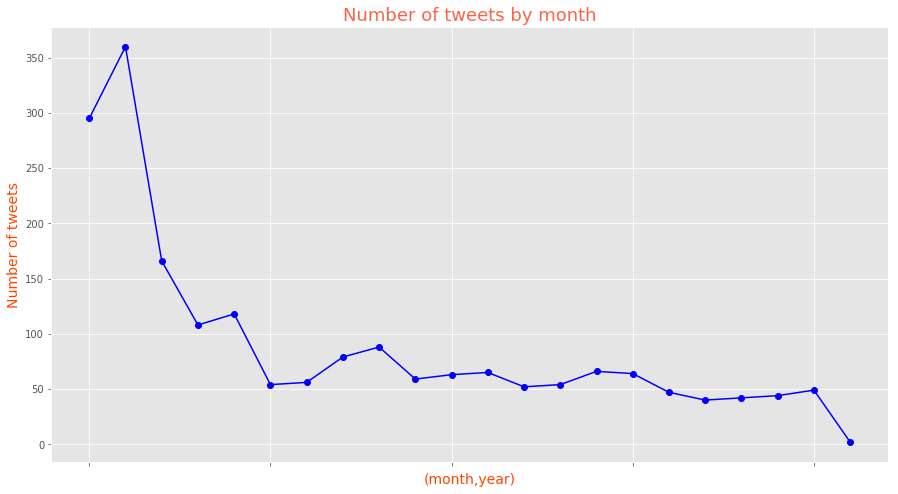

In [180]:
#set style
plt.style.use('ggplot')
#multi-index 
tweet_by_time.plot(style='-bo', figsize=(15,8))
plt.xlabel("(month,year)",color = 'orangered',fontsize = 14)
plt.ylabel("Number of tweets",color = 'orangered',fontsize = 14)
plt.title("Number of tweets by month",color = 'tomato',fontsize = 18)
#plt.savefig('tweetssmonth.png')

In [181]:
tweet_by_time.index

MultiIndex(levels=[[2015, 2016, 2017], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]],
           labels=[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2], [10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7]],
           names=['timestamp', 'timestamp'])

### Average favorites and retweets by month


In [182]:
favorite_by_time = master_df.groupby([master_df["timestamp"].dt.year, master_df["timestamp"].dt.month]).favorite_count.mean()
favorite_by_time

timestamp  timestamp
2015       11          1240.037288 
           12          3518.419444 
2016       1           3990.674699 
           2           4308.157407 
           3           4638.567797 
           4           4703.851852 
           5           6101.107143 
           6           9520.607595 
           7           6980.761364 
           8           10307.440678
           9           11435.476190
           10          13294.169231
           11          14896.269231
           12          16213.777778
2017       1           19743.121212
           2           18737.265625
           3           20573.404255
           4           23107.300000
           5           29039.166667
           6           29126.159091
           7           31801.183673
           8           36643.000000
Name: favorite_count, dtype: float64

In [183]:
retweet_by_time = master_df.groupby([master_df["timestamp"].dt.year, master_df["timestamp"].dt.month]).retweet_count.mean()
retweet_by_time

timestamp  timestamp
2015       11          541.620339 
           12          1517.000000
2016       1           1519.614458
           2           1609.111111
           3           1650.754237
           4           1613.203704
           5           2183.303571
           6           4136.886076
           7           2482.545455
           8           3671.864407
           9           3687.285714
           10          4274.276923
           11          4922.961538
           12          5400.351852
2017       1           6443.575758
           2           4438.031250
           3           4886.212766
           4           5844.275000
           5           7570.023810
           6           6586.090909
           7           6868.530612
           8           7683.500000
Name: retweet_count, dtype: float64

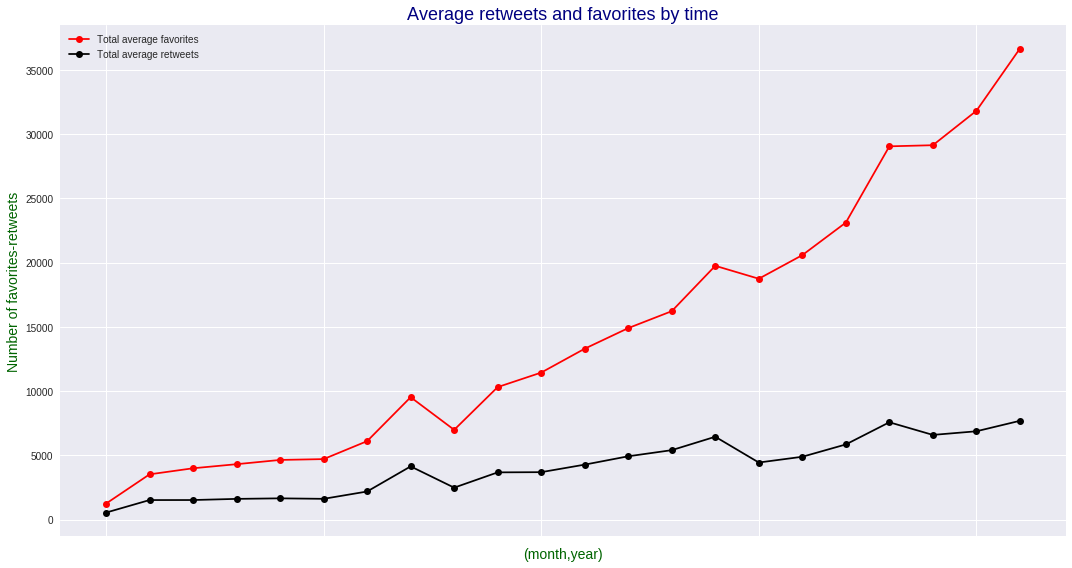

In [184]:
plt.style.use('seaborn')
favorite_by_time.plot(style='-ro', figsize=(15,8),label='Total average favorites')
#plt.plot(timeyear.index,timeyear) multi index won't work
retweet_by_time.plot(style='-ko', figsize=(15,8),label='Total average retweets')
plt.xlabel("(month,year)",color = 'darkgreen',fontsize = 14)
plt.ylabel("Number of favorites-retweets",color = 'darkgreen',fontsize = 14)
plt.title("Average retweets and favorites by time" ,color = 'navy',fontsize = 18)
plt.legend()
plt.tight_layout()
#plt.savefig('retfavv.png')

It's  not full three years (2 m >> 2015)

## Corelation between favorites and retweets

In [185]:
#rating ratio to be used as color range
rate =color_range = master_df["rating_numerator"] / master_df["rating_denominator"]
rate

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
5      1.000000
6      1.000000
7      1.000000
8      1.000000
9      1.000000
10     1.000000
11     1.000000
12     1.000000
13     1.000000
14     1.000000
15     1.000000
16     1.000000
17     1.000000
18     1.000000
19     1.000000
20     0.900000
21     1.000000
22     1.000000
23     1.000000
24     1.000000
25     1.000000
26     1.000000
27     1.000000
28     1.000000
29     1.000000
         ...   
1941   1.000000
1942   1.000000
1943   1.000000
1944   1.000000
1945   1.000000
1946   1.000000
1947   1.000000
1948   1.000000
1949   1.000000
1950   1.000000
1951   1.000000
1952   1.000000
1953   1.000000
1954   1.000000
1955   1.000000
1956   1.000000
1957   1.000000
1958   1.000000
1959   1.000000
1960   1.000000
1961   1.000000
1962   1.000000
1963   1.000000
1964   1.000000
1965   1.000000
1966   1.000000
1967   1.000000
1968   1.000000
1969   1.000000
1970   1.000000
Length: 1971, dtype: flo

In [186]:
rate.value_counts()

1.000000    1961
1.300000    1   
1.350000    1   
1.126000    1   
1.100000    1   
1.400000    1   
1.127000    1   
0.900000    1   
0.975000    1   
1.020000    1   
dtype: int64

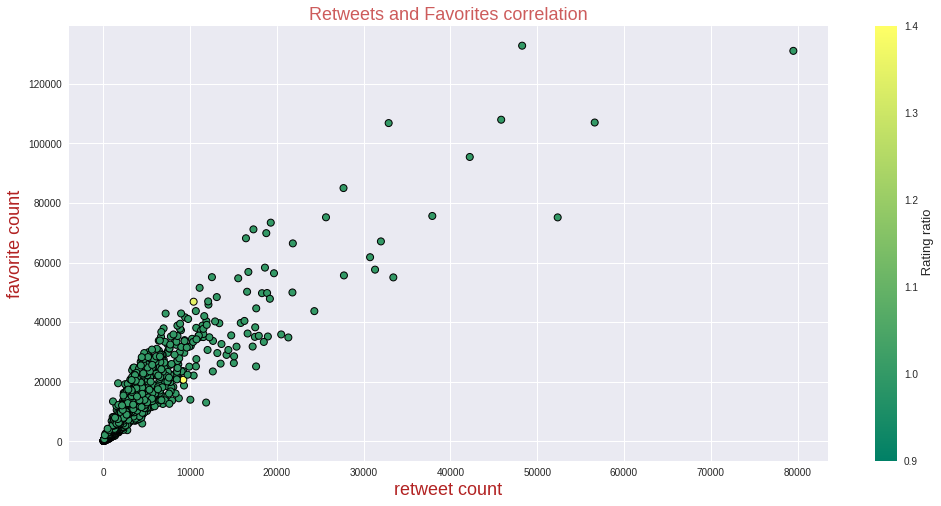

In [187]:
# alpha: transparrency
plt.style.use('seaborn')
plt.figure(figsize = (17,8))
plt.scatter(master_df["retweet_count"], master_df["favorite_count"], edgecolor = 'black',c = rate, cmap = 'summer', linewidth = 1)
plt.xlabel("retweet count" ,color = 'firebrick',fontsize = 18)
plt.ylabel("favorite count" ,color = 'firebrick',fontsize = 18)
plt.title("Retweets and Favorites correlation", color = 'indianred', fontsize = 18)
cbar = plt.colorbar()
cbar.set_label(' Rating ratio', fontsize = 13)
#plt.savefig('corel.png')

#### Logarithmic view as values are near

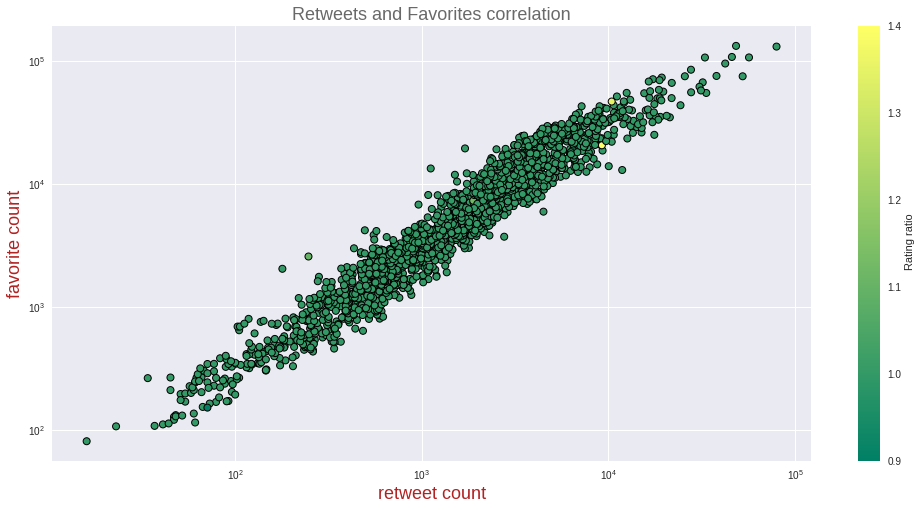

In [188]:
# alpha: transparrency
plt.style.use('seaborn')
plt.figure(figsize = (17,8))
plt.scatter(master_df["retweet_count"], master_df["favorite_count"], edgecolor = 'black',c = color_range, cmap = 'summer', linewidth = 1)
plt.xlabel("retweet count" ,color = 'firebrick',fontsize = 18)
plt.ylabel("favorite count" ,color = 'firebrick',fontsize = 18)
plt.title("Retweets and Favorites correlation", color = 'dimgray', fontsize = 18)
cbar = plt.colorbar()
cbar.set_label(' Rating ratio')
plt.xscale('log')
plt.yscale('log')

## Dog breeds with retweets- favorites

### Number of tweets for each breed

In [189]:
# descend sort >> value_counts
allbreeds = master_df.breed.value_counts()
allbreeds

golden retriever                  151
labrador retriever                101
pembroke                          94 
chihuahua                         88 
pug                               60 
chow                              45 
samoyed                           42 
pomeranian                        41 
toy poodle                        41 
malamute                          33 
french bulldog                    28 
cocker spaniel                    28 
chesapeake bay retriever          26 
miniature pinscher                24 
shih-tzu                          21 
siberian husky                    21 
german shepherd                   21 
cardigan                          21 
staffordshire bullterrier         20 
eskimo dog                        20 
maltese dog                       19 
shetland sheepdog                 19 
kuvasz                            18 
italian greyhound                 17 
beagle                            17 
lakeland terrier                  17 
rottweiler  

In [190]:
allbreeds.describe()

count   112.000000
mean    14.285714 
std     21.441069 
min     1.000000  
25%     4.000000  
50%     8.000000  
75%     15.250000 
max     151.000000
Name: breed, dtype: float64

<Container object of 112 artists>

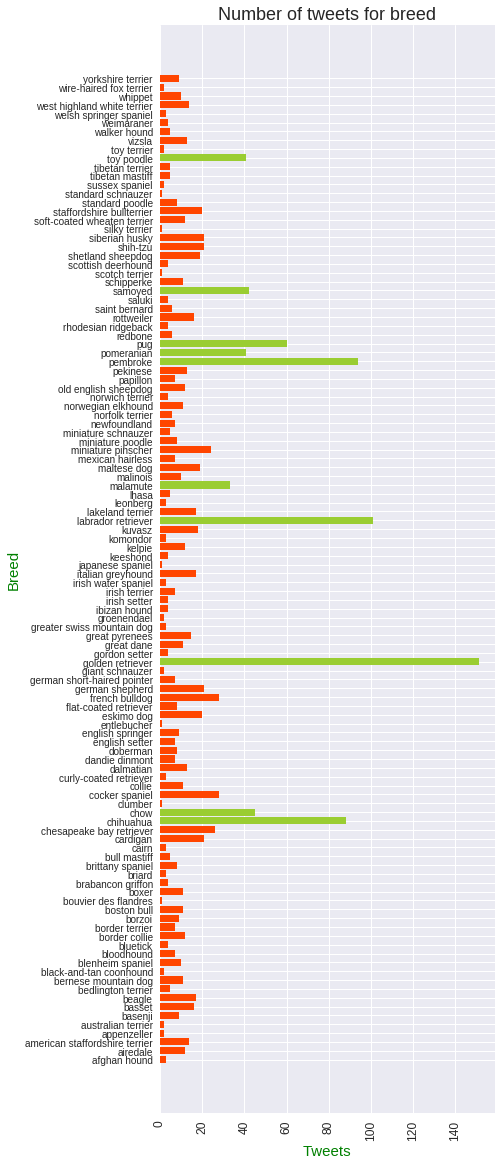

In [191]:
'''
for vertical bar display
plt.figure(figsize=(30, 10))
# thistle color if more than 30 dogs
clrs = ['cornflowerblue' if (x < 30) else 'thistle' for x in allbreeds ]
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel("Breed", fontsize = 15, color = 'green')
plt.ylabel("Tweets", fontsize = 15, color = 'green')
plt.bar(allbreeds.index,allbreeds, width = 0.9, color = clrs)
'''
plt.style.use('seaborn')
plt.figure(figsize=(6, 20))
# thistle color if more than 30 dogs
clrs = ['orangered' if (x < 30) else 'yellowgreen' for x in allbreeds ]
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel("Tweets", fontsize = 15, color = 'green')
plt.ylabel("Breed", fontsize = 15, color = 'green')
plt.title("Number of tweets for breed", fontsize = 18)

plt.barh(allbreeds.index,allbreeds, color = clrs)
#plt.savefig('nodogstwwet.png')

In [192]:
#groupby values are not sorted
breed_by_favorite = master_df.groupby("breed")["favorite_count"].mean()
breed_by_favorite.sort_values(ascending = False)

breed
saluki                        24060.000000
bouvier des flandres          18032.000000
afghan hound                  17326.666667
giant schnauzer               17314.500000
black-and-tan coonhound       17012.000000
french bulldog                16861.214286
flat-coated retriever         16791.625000
irish water spaniel           16400.000000
english springer              15657.222222
leonberg                      14934.333333
standard poodle               14302.750000
cocker spaniel                13980.857143
samoyed                       13902.523810
border terrier                13578.000000
cardigan                      13106.238095
tibetan mastiff               13087.400000
bedlington terrier            13025.000000
golden retriever              12537.264901
great pyrenees                12327.400000
lakeland terrier              12194.176471
labrador retriever            12015.118812
weimaraner                    11982.750000
basset                        11761.062500
norwe

In [193]:
# all values of favorite_count to mark a checkpoint of value for breed
breed_by_favorite.describe()

count   112.000000  
mean    8118.800355 
std     4367.594882 
min     1156.500000 
25%     4839.238095 
50%     7318.750000 
75%     10702.150000
max     24060.000000
Name: favorite_count, dtype: float64

Text(0.5,1,'Average of favorites for breed')

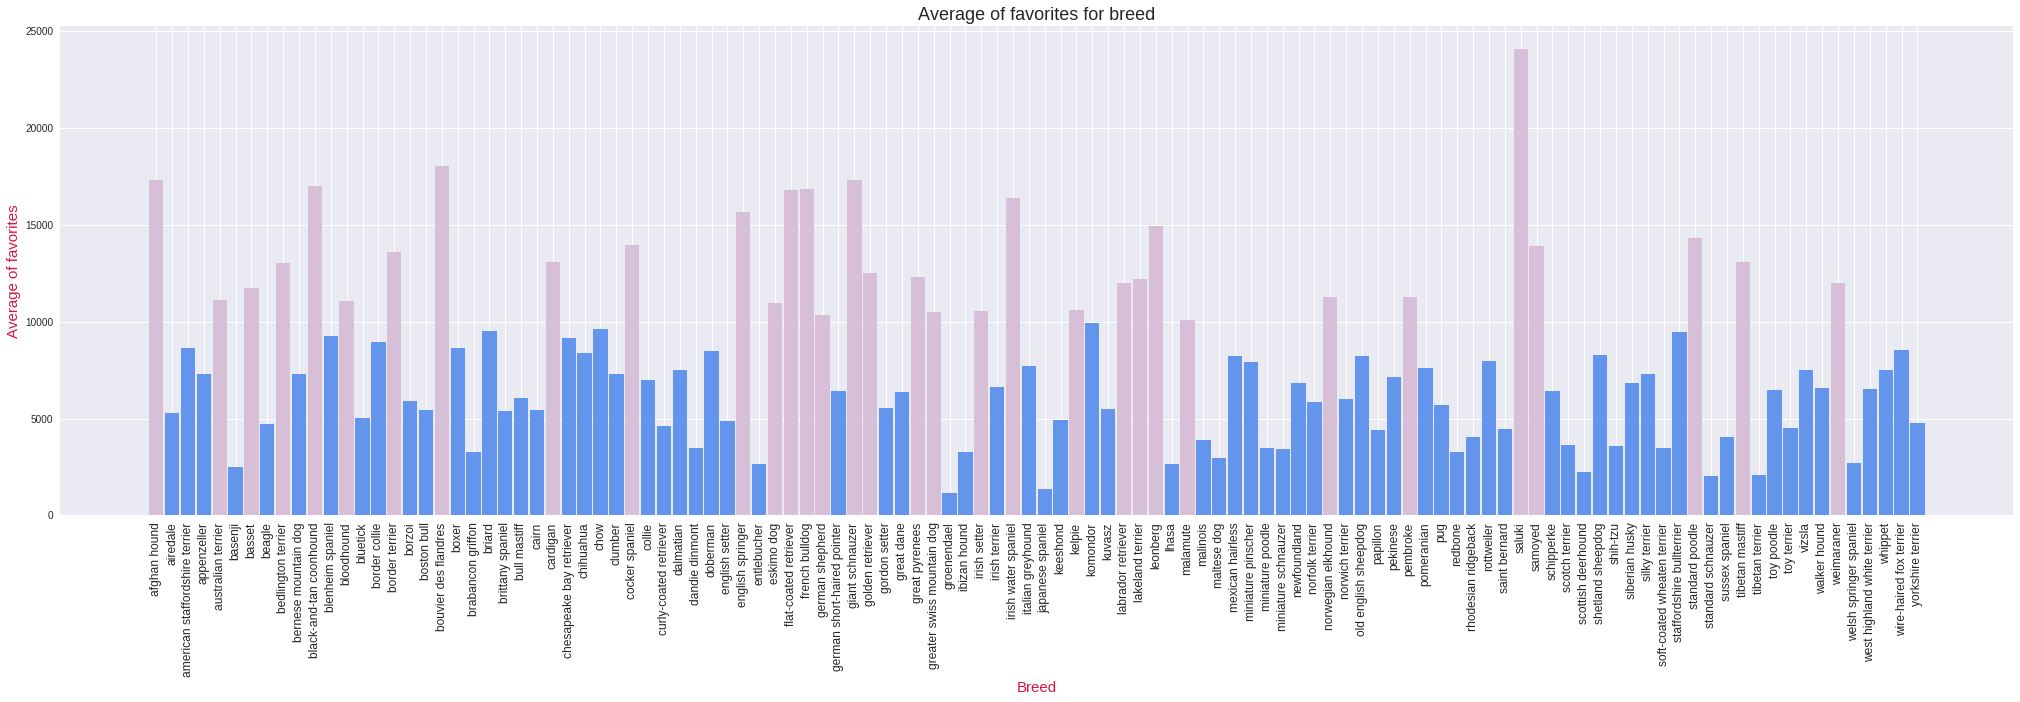

In [194]:
plt.figure(figsize=(35, 9))

clrs = ['cornflowerblue' if (x < 10000) else 'thistle' for x in breed_by_favorite ]
plt.xticks(rotation = 90, fontsize = 12)

plt.bar(breed_by_favorite.index,breed_by_favorite, width = 0.9, color = clrs)
plt.xlabel("Breed", fontsize = 15, color = 'crimson')
plt.ylabel("Average of favorites", fontsize = 15, color = 'crimson')
plt.title("Average of favorites for breed", fontsize = 18)
#plt.savefig('allbreedfav.png')

## Filtering breeds on tweet number basis for insights on favorites-retweets

value_counts()  has descending sorting

groupby()  >> sorts by keys if strings alphabetic >> use sort_values(ascending = False)

In [195]:
# about 75% 15.250000 
allbreeds.iloc[:30]

golden retriever                  151
labrador retriever                101
pembroke                          94 
chihuahua                         88 
pug                               60 
chow                              45 
samoyed                           42 
pomeranian                        41 
toy poodle                        41 
malamute                          33 
french bulldog                    28 
cocker spaniel                    28 
chesapeake bay retriever          26 
miniature pinscher                24 
shih-tzu                          21 
siberian husky                    21 
german shepherd                   21 
cardigan                          21 
staffordshire bullterrier         20 
eskimo dog                        20 
maltese dog                       19 
shetland sheepdog                 19 
kuvasz                            18 
italian greyhound                 17 
beagle                            17 
lakeland terrier                  17 
rottweiler  

In [196]:
# to slice whole pandas series use iloc: allbreeds.iloc[0:9]
# 75% by total number of tweets for breed
breeds_75 = allbreeds.index[:30]
breeds_75

Index(['golden retriever', 'labrador retriever', 'pembroke', 'chihuahua',
       'pug', 'chow', 'samoyed', 'pomeranian', 'toy poodle', 'malamute',
       'french bulldog', 'cocker spaniel', 'chesapeake bay retriever',
       'miniature pinscher', 'shih-tzu', 'siberian husky', 'german shepherd',
       'cardigan', 'staffordshire bullterrier', 'eskimo dog', 'maltese dog',
       'shetland sheepdog', 'kuvasz', 'italian greyhound', 'beagle',
       'lakeland terrier', 'rottweiler', 'basset', 'great pyrenees',
       'american staffordshire terrier'],
      dtype='object')

In [197]:
# using isin(list) to query on a list
breeds_75_df = master_df[master_df.breed.isin(breeds_75)]
breeds_75_df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,breed,favorite_count,retweet_count
2,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,10.000000,10.000000,NaN,NaN,german shepherd,128,47
4,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,10.000000,10.000000,NaN,NaN,miniature pinscher,111,41
7,666055525042405380,2015-11-16 00:49:46,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,10.000000,10.000000,NaN,NaN,chow,448,261
8,666057090499244032,2015-11-16 00:55:59,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,10.000000,10.000000,NaN,NaN,golden retriever,304,146
10,666063827256086533,2015-11-16 01:22:45,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,10.000000,10.000000,NaN,NaN,golden retriever,496,232
13,666082916733198337,2015-11-16 02:38:37,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,10.000000,10.000000,NaN,NaN,pug,121,47
19,666273097616637952,2015-11-16 15:14:19,Can take selfies 11/10 https://t.co/ws2AMaNwPW,10.000000,10.000000,NaN,NaN,italian greyhound,184,82
20,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.000000,10.000000,NaN,NaN,maltese dog,152,71
23,666345417576210432,2015-11-16 20:01:42,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB,10.000000,10.000000,NaN,NaN,golden retriever,307,146
24,666353288456101888,2015-11-16 20:32:58,Here we have a mixed Asiago from the Galápagos Islands. Only one ear working. Big fan of marijuana carpet. 8/10 https://t.co/tltQ5w9aUO,10.000000,10.000000,NaN,NaN,malamute,229,77


In [198]:
#groupby values are not sorted
# mean favorite count for each breed
selectbreed_by_favorite = breeds_75_df.groupby("breed")["favorite_count"].mean()
selectbreed_by_favorite.sort_values(ascending = False)

breed
french bulldog                   16861.214286
cocker spaniel                   13980.857143
samoyed                          13902.523810
cardigan                         13106.238095
golden retriever                 12537.264901
great pyrenees                   12327.400000
lakeland terrier                 12194.176471
labrador retriever               12015.118812
basset                           11761.062500
pembroke                         11278.361702
eskimo dog                       10971.850000
german shepherd                  10355.666667
malamute                         10086.636364
chow                             9600.711111 
staffordshire bullterrier        9488.500000 
chesapeake bay retriever         9160.192308 
american staffordshire terrier   8670.142857 
chihuahua                        8376.215909 
shetland sheepdog                8282.105263 
rottweiler                       7982.437500 
miniature pinscher               7910.375000 
italian greyhound           

In [199]:
# mean retweet count for each breed
selectbreed_by_retweet = breeds_75_df.groupby("breed")["retweet_count"].mean()
selectbreed_by_retweet.sort_values(ascending = False)

breed
cocker spaniel                   4945.428571
samoyed                          4843.952381
great pyrenees                   4487.866667
french bulldog                   4421.821429
lakeland terrier                 4346.823529
eskimo dog                       4345.500000
cardigan                         3899.476190
labrador retriever               3858.643564
golden retriever                 3776.947020
pembroke                         3170.414894
malamute                         3106.515152
chihuahua                        2858.159091
basset                           2851.562500
chow                             2781.600000
pomeranian                       2727.878049
german shepherd                  2676.428571
chesapeake bay retriever         2500.423077
rottweiler                       2449.687500
staffordshire bullterrier        2374.100000
toy poodle                       2361.219512
shetland sheepdog                2353.105263
american staffordshire terrier   2303.357143
mini

In [200]:
selectbreed_by_favorite.describe()

count   30.000000   
mean    9398.482547 
std     3274.815357 
min     2959.684211 
25%     7622.644189 
50%     9324.346154 
75%     11951.604734
max     16861.214286
Name: favorite_count, dtype: float64

In [201]:
selectbreed_by_retweet.describe()

count   30.000000  
mean    2897.068426
std     1083.943640
min     1238.263158
25%     2222.370536
50%     2702.153310
75%     3838.219428
max     4945.428571
Name: retweet_count, dtype: float64

'''# mean retweet count for each breed
selectbreed_by_rate = breeds_75_df.groupby("breed")[breeds_75_df["rating_numerator"] / breeds_75_df["rating_denominator"]].mean()
selectbreed_by_rate.sort_values(ascending = False)'''


In [202]:
# rate was created in corelation instead of repeating calculation
breeds_75_df ["rate"] = rate
selectbreed_by_rate = breeds_75_df.groupby("breed").rate.mean()
selectbreed_by_rate.sort_values(ascending = False)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


breed
kuvasz                           1.007000
golden retriever                 1.005000
siberian husky                   1.004762
miniature pinscher               1.000833
italian greyhound                1.000000
basset                           1.000000
beagle                           1.000000
cardigan                         1.000000
chesapeake bay retriever         1.000000
chihuahua                        1.000000
chow                             1.000000
cocker spaniel                   1.000000
eskimo dog                       1.000000
french bulldog                   1.000000
german shepherd                  1.000000
great pyrenees                   1.000000
toy poodle                       1.000000
staffordshire bullterrier        1.000000
labrador retriever               1.000000
lakeland terrier                 1.000000
malamute                         1.000000
pembroke                         1.000000
pug                              1.000000
rottweiler                  

'''
width = 0.35

ind = np.arange(len(selectbreed_by_favorite))
locations = ind + width / 2  
labels = selectbreed_by_favorite.index  # xtick labels
plt.bar(ind, selectbreed_by_retweet, width, color='#000080', label= 'Average_retweet_count')
plt.bar(ind +width , selectbreed_by_favorite, width, color='#0F52BA', label= 'Average_favorite_count')
plt.xticks(locations, labels)
plt.legend()
plt.title("Interaction with different Dog stages");
'''


<Container object of 30 artists>

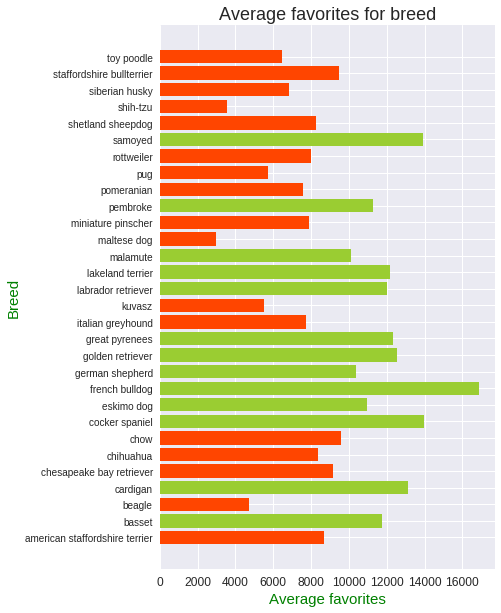

In [203]:

#plt.style.use is not a one time use it's defaulted to style and you have to change 

plt.style.use('seaborn')
plt.figure(figsize=(6, 10))

# yellowgreen color if more 10,000 fav (approx 50% value)
clrs = ['orangered' if (x < 10000) else 'yellowgreen' for x in selectbreed_by_favorite ]

plt.xticks( fontsize = 12)

plt.xlabel("Average favorites", fontsize = 15, color = 'green')
plt.ylabel("Breed", fontsize = 15, color = 'green')
plt.title("Average favorites for breed", fontsize = 18)

plt.barh(selectbreed_by_favorite.index,selectbreed_by_favorite, color = clrs)
#plt.savefig('Averagefavoritesforbreed.png')

<Container object of 30 artists>

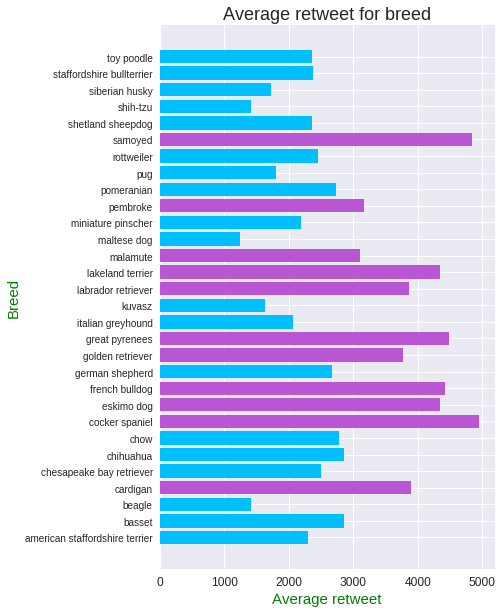

In [204]:

#plt.style.use is not a one time use it's defaulted to style and you have to change 

plt.style.use('seaborn')
plt.figure(figsize=(6, 10))

# yellowgreen color if more 3000 fav (approx 50% value)
clrs = ['deepskyblue' if (x < 3000) else 'mediumorchid' for x in selectbreed_by_retweet ]

plt.xticks( fontsize = 12)

plt.xlabel("Average retweet", fontsize = 15, color = 'green')
plt.ylabel("Breed", fontsize = 15, color = 'green')
plt.title("Average retweet for breed", fontsize = 18)

plt.barh(selectbreed_by_retweet.index, selectbreed_by_retweet, color = clrs)

## Dog stages insights with retweets and favorties

In [205]:
stages = master_df.dog_stage.value_counts()
stages

pupper           201
doggo            63 
puppo            22 
doggo_pupper     8  
floofer          7  
doggo_floofer    1  
doggo_puppo      1  
Name: dog_stage, dtype: int64

<Container object of 7 artists>

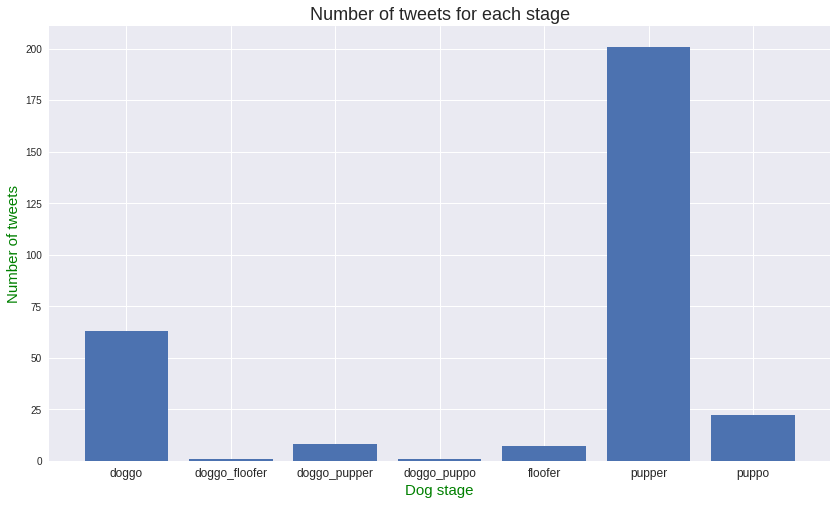

In [206]:
# vertical bar display
plt.figure(figsize=(14, 8))

plt.xticks( fontsize = 12)
plt.xlabel("Dog stage", fontsize = 15, color = 'green')
plt.ylabel("Number of tweets", fontsize = 15, color = 'green')
plt.title("Number of tweets for each stage", fontsize = 18)
plt.bar(stages.index,stages)

In [207]:
stage_by_favorite = master_df.groupby('dog_stage')["favorite_count"].mean()
stage_by_favorite

dog_stage
doggo           19356.380952
doggo_floofer   17169.000000
doggo_pupper    13219.875000
doggo_puppo     47844.000000
floofer         13206.000000
pupper          7250.527363 
puppo           21582.090909
Name: favorite_count, dtype: float64

In [208]:
stage_by_retweet = master_df.groupby('dog_stage')["retweet_count"].mean()
stage_by_retweet

dog_stage
doggo           7125.698413 
doggo_floofer   3433.000000 
doggo_pupper    4397.250000 
doggo_puppo     19196.000000
floofer         4968.714286 
pupper          2382.502488 
puppo           6473.954545 
Name: retweet_count, dtype: float64

In [209]:
master_df.groupby('dog_stage')["favorite_count"].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,63.000000,19356.380952,22208.483825,2593.000000,8268.000000,12376.000000,20502.500000,131075.000000
doggo_floofer,1.000000,17169.000000,nan,17169.000000,17169.000000,17169.000000,17169.000000,17169.000000
doggo_pupper,8.000000,13219.875000,12872.606889,4849.000000,8206.250000,9346.500000,10731.750000,44619.000000
doggo_puppo,1.000000,47844.000000,nan,47844.000000,47844.000000,47844.000000,47844.000000,47844.000000
floofer,7.000000,13206.000000,11258.315105,2262.000000,5045.500000,11302.000000,17721.000000,33345.000000
pupper,201.000000,7250.527363,10743.931650,693.000000,2449.000000,3275.000000,7842.000000,106827.000000
puppo,22.000000,21582.090909,28034.339585,3277.000000,7043.500000,13387.500000,19691.250000,132810.000000


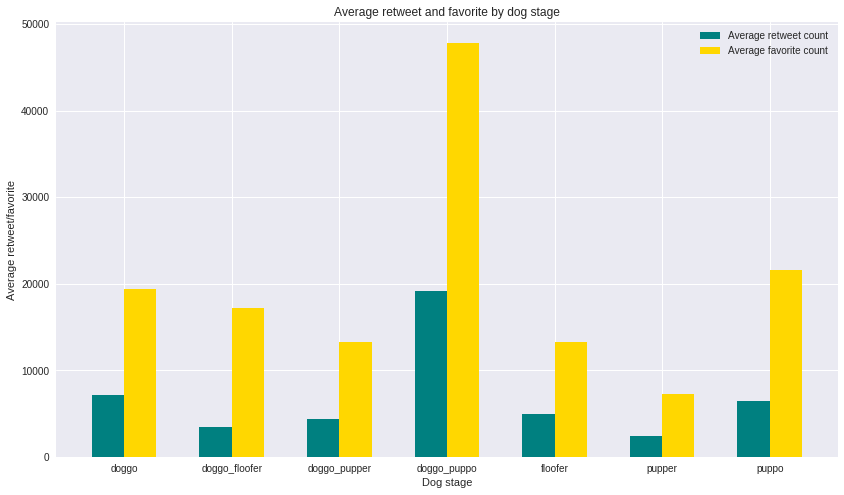

In [210]:
plt.style.use('seaborn')
plt.figure(figsize=(14, 8))
width = 0.3
ind = np.arange(len(stage_by_favorite))
locations = ind + width / 2  
labels = stage_by_favorite.index  # xtick labels
plt.bar(ind, stage_by_retweet, width, color='teal', label= 'Average retweet count')
plt.bar(ind +width , stage_by_favorite, width, color='gold', label= 'Average favorite count')
plt.xticks(locations, labels)
plt.xlabel("Dog stage")
plt.ylabel("Average retweet/favorite")
plt.legend()
plt.title("Average retweet and favorite by dog stage");